<font size="5.8">Summary</font>  

In mathematics, a time series is a series of data points indexed in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Time series forecasting is predicting future based on historical data such as finishing a friend’s sentence or anticipating the smell of coffee at breakfast, or predicting stock prices to tell us when to sell or buy. In this notebook, time series prediction is first applied with supervised learning including linear regression, neural network, decision trees and random forest. Second with deep learning including recurrent neural network (RNN), long short-term memory (LSTM) and gated recurrent unit (GRU). Future prediction is presented with uncertainty assessment calculated with 50 simulations for technique. So, running this notebook takes time. Two realistic data [Sunspots](http://www.sidc.be/silso/INFO/sndtotcsv.php) and [Total Energy Consumption in Alberta](https://www.aeso.ca/market/market-and-system-reporting/) are applied for this notebook. Python functions and data files to run this notebook is in my [Github](https://github.com/MehdiRezvandehy/Time_Series_Forecasting.git) page.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from IPython.display import clear_output
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from matplotlib.ticker import PercentFormatter
import warnings
warnings.filterwarnings('ignore')
from functions import* # import require functions to run this notebook

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sun-Spots-Example" data-toc-modified-id="Sun-Spots-Example-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sun Spots Example</a></span><ul class="toc-item"><li><span><a href="#Imputation-with-KNN" data-toc-modified-id="Imputation-with-KNN-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imputation with KNN</a></span></li><li><span><a href="#Mean-Value-for-each-Month" data-toc-modified-id="Mean-Value-for-each-Month-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Mean Value for each Month</a></span></li><li><span><a href="#Training-and-Test-sets" data-toc-modified-id="Training-and-Test-sets-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Training and Test sets</a></span></li><li><span><a href="#Prediction-with-Supervised-Learning" data-toc-modified-id="Prediction-with-Supervised-Learning-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Prediction with Supervised Learning</a></span><ul class="toc-item"><li><span><a href="#Convert-Time-Series-to-Supervised-Learning-Problem" data-toc-modified-id="Convert-Time-Series-to-Supervised-Learning-Problem-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Convert Time Series to Supervised Learning Problem</a></span></li><li><span><a href="#Cross-Validation-on-Time-Series-data" data-toc-modified-id="Cross-Validation-on-Time-Series-data-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Cross-Validation on Time-Series data</a></span></li><li><span><a href="#Predictive-Algorithms" data-toc-modified-id="Predictive-Algorithms-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Predictive Algorithms</a></span></li></ul></li><li><span><a href="#Deep-Learning" data-toc-modified-id="Deep-Learning-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Deep Learning</a></span><ul class="toc-item"><li><span><a href="#Recurrent-Neural-Network-(RNN)" data-toc-modified-id="Recurrent-Neural-Network-(RNN)-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Recurrent Neural Network (RNN)</a></span></li><li><span><a href="#LSTM-(Long-Short-Term-Memory)" data-toc-modified-id="LSTM-(Long-Short-Term-Memory)-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>LSTM (Long Short-Term Memory)</a></span></li><li><span><a href="#Gated-Recurrent-Unit-(GRU)" data-toc-modified-id="Gated-Recurrent-Unit-(GRU)-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Gated Recurrent Unit (GRU)</a></span></li></ul></li><li><span><a href="#Uncertainty-Assessment-for-Prediction-at-2025-12" data-toc-modified-id="Uncertainty-Assessment-for-Prediction-at-2025-12-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Uncertainty Assessment for Prediction at 2025-12</a></span></li></ul></li><li><span><a href="#Total-Energy-Consumption-in-Alberta" data-toc-modified-id="Total-Energy-Consumption-in-Alberta-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Total Energy Consumption in Alberta</a></span><ul class="toc-item"><li><span><a href="#Training-and-Test-sets" data-toc-modified-id="Training-and-Test-sets-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Training and Test sets</a></span></li><li><span><a href="#Prediction-with-Supervised-Learning" data-toc-modified-id="Prediction-with-Supervised-Learning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Prediction with Supervised Learning</a></span><ul class="toc-item"><li><span><a href="#Cross-Validation-on-Time-Series-data" data-toc-modified-id="Cross-Validation-on-Time-Series-data-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Cross-Validation on Time-Series data</a></span></li><li><span><a href="#Predictive-Algorithms" data-toc-modified-id="Predictive-Algorithms-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Predictive Algorithms</a></span></li></ul></li><li><span><a href="#Deep-Learning" data-toc-modified-id="Deep-Learning-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Deep Learning</a></span><ul class="toc-item"><li><span><a href="#Recurrent-Neural-Network-(RNN)" data-toc-modified-id="Recurrent-Neural-Network-(RNN)-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Recurrent Neural Network (RNN)</a></span></li><li><span><a href="#LSTM-(Long-Short-Term-Memory)" data-toc-modified-id="LSTM-(Long-Short-Term-Memory)-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>LSTM (Long Short-Term Memory)</a></span></li><li><span><a href="#Gated-Recurrent-Unit-(GRU)" data-toc-modified-id="Gated-Recurrent-Unit-(GRU)-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Gated Recurrent Unit (GRU)</a></span></li></ul></li><li><span><a href="#Uncertainty-Assessment-for-Prediction-at-2023-12-01" data-toc-modified-id="Uncertainty-Assessment-for-Prediction-at-2023-12-01-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Uncertainty Assessment for Prediction at 2023-12-01</a></span></li></ul></li></ul></div>

# Sun Spots Example

In this notebook, a time series data is presented to predict sunspots. The data is hemispheric sunspot numbers, can downloaded from [sunspots time series](http://www.sidc.be/silso/INFO/sndtotcsv.php). The data set is from 1/1/1818 to 1/1/2022.

In [2]:
Names = ['year', 'month', 'day', 'dec_year', 'sn_value' , 
         'sn_error', 'obs_num']
df_sunspot = pd.read_csv('./Data/SN_d_tot_V2.0.csv',sep=';',header=None,names=Names,
                 na_values=['-1'], index_col=False)
df_sunspot['sn_value'].replace(-1, np.nan,inplace=True)
df_sunspot.insert(loc=0, column='No.', value=df_sunspot.index.to_list())

print("Look at first 20 rows:")
print(df_sunspot.iloc[0:20])

Look at first 20 rows:
    No.  year  month  day  dec_year  sn_value  sn_error  obs_num
0     0  1818      1    1  1818.001       NaN       NaN        0
1     1  1818      1    2  1818.004       NaN       NaN        0
2     2  1818      1    3  1818.007       NaN       NaN        0
3     3  1818      1    4  1818.010       NaN       NaN        0
4     4  1818      1    5  1818.012       NaN       NaN        0
5     5  1818      1    6  1818.015       NaN       NaN        0
6     6  1818      1    7  1818.018       NaN       NaN        0
7     7  1818      1    8  1818.021      65.0      10.2        1
8     8  1818      1    9  1818.023       NaN       NaN        0
9     9  1818      1   10  1818.026       NaN       NaN        0
10   10  1818      1   11  1818.029       NaN       NaN        0
11   11  1818      1   12  1818.032       NaN       NaN        0
12   12  1818      1   13  1818.034      37.0       7.7        1
13   13  1818      1   14  1818.037       NaN       NaN        0
14

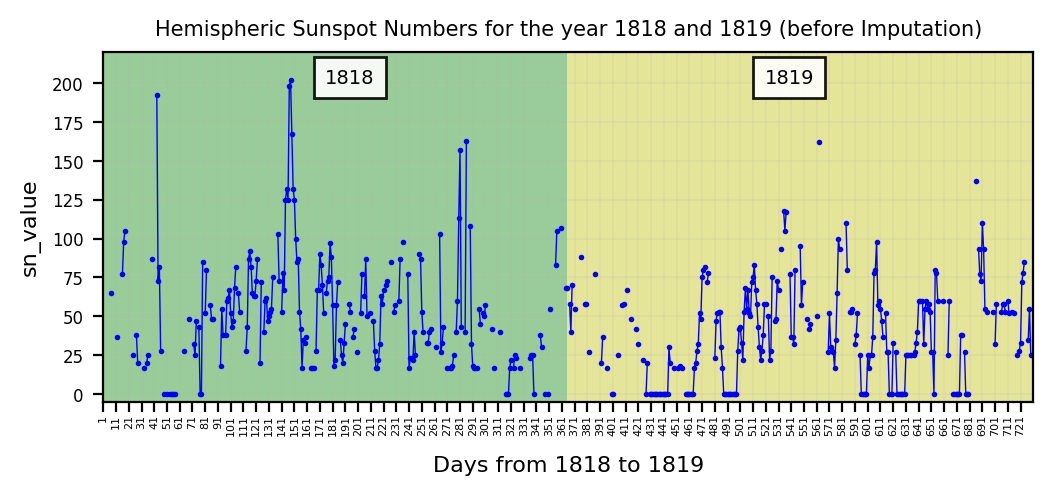

In [3]:
font = {'size'   :6 }
plt.rc('font', **font)
fig=plt.figure(figsize=(6, 5), dpi= 200, facecolor='w', edgecolor='k')
ax1=plt.subplot(2,1,1) 
no_day=730
date=df_sunspot[['sn_value']].iloc[0:no_day].values.tolist()
days=df_sunspot['day'].iloc[0:no_day].astype(str).values.tolist()
plt.plot(date,'bo-', markersize=1, linewidth=0.5)
ax1.grid(axis='both',linewidth='0.1')
plt.xticks(np.arange(1,len(days)+1,10))
ax1.set_xticklabels(np.arange(1,len(days)+1,10), rotation=90,fontsize=4,y=0.02)
plt.title('Hemispheric Sunspot Numbers for the year 1818 and 1819 (before Imputation)',fontsize=7.5)
plt.xlabel('Days from 1818 to 1819',fontsize=8,labelpad=7)
plt.ylabel('sn_value',fontsize=8)
plt.xlim((1,no_day+1))

jet= plt.get_cmap('jet')
colors = plt.cm.jet(np.linspace(0,1,2))
plt.axvspan(1,365, facecolor='g', alpha=0.4)
plt.text(175, 200,'1818',fontsize=7,bbox=dict(facecolor='w', alpha=0.9))
plt.axvspan(365,730, facecolor='y', alpha=0.4)
plt.text(520, 200,'1819',fontsize=7,bbox=dict(facecolor='w', alpha=0.9))
    
plt.ylim((-5,220))    
plt.show()

## Imputation with KNN

Time series forecasting requires completed series so all missing values should be imputed. K Nearest Neighbour (KNN) is applied to impute all missing values to have complete time series to feed models.

In [4]:
imputer = KNNImputer(n_neighbors=5, weights='uniform')
val=df_sunspot[['No.','sn_value']].values
df_sunspot['sn_value']=imputer.fit_transform(val)[:,1]

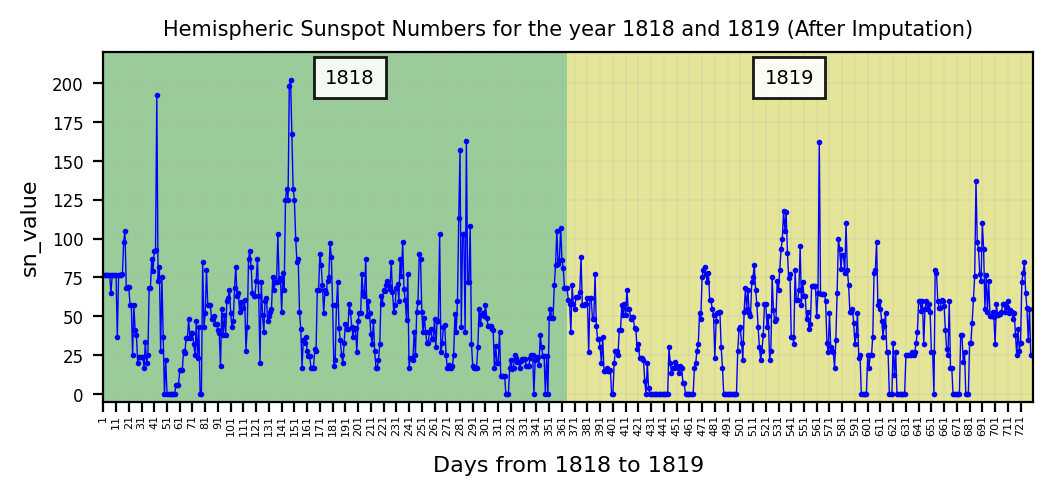

In [5]:
font = {'size'   :6 }
plt.rc('font', **font)
fig=plt.figure(figsize=(6, 5), dpi= 200, facecolor='w', edgecolor='k')
ax1=plt.subplot(2,1,1) 
no_day=730
date=df_sunspot[['sn_value']].iloc[0:no_day].values.tolist()
days=df_sunspot['day'].iloc[0:no_day].astype(str).values.tolist()
plt.plot(date,'bo-', markersize=1, linewidth=0.5)
ax1.grid(axis='both',linewidth='0.1')
plt.xticks(np.arange(1,len(days)+1,10))
ax1.set_xticklabels(np.arange(1,len(days)+1,10), rotation=90,fontsize=4,y=0.02)
plt.title('Hemispheric Sunspot Numbers for the year 1818 and 1819 (After Imputation)',fontsize=7.5)
plt.xlabel('Days from 1818 to 1819',fontsize=8,labelpad=7)
plt.ylabel('sn_value',fontsize=8)
plt.xlim((1,no_day+1))

jet= plt.get_cmap('jet')
colors = plt.cm.jet(np.linspace(0,1,2))
plt.axvspan(1,365, facecolor='g', alpha=0.4)
plt.text(175, 200,'1818',fontsize=7,bbox=dict(facecolor='w', alpha=0.9))
plt.axvspan(365,730, facecolor='y', alpha=0.4)
plt.text(520, 200,'1819',fontsize=7,bbox=dict(facecolor='w', alpha=0.9))
    
plt.ylim((-5,220))    
plt.show()

In [6]:
print("Look at first 20 rows:")
print(df_sunspot.iloc[:20])

Look at first 20 rows:
    No.  year  month  day  dec_year  sn_value  sn_error  obs_num
0     0  1818      1    1  1818.001      76.4       NaN        0
1     1  1818      1    2  1818.004      76.4       NaN        0
2     2  1818      1    3  1818.007      76.4       NaN        0
3     3  1818      1    4  1818.010      76.4       NaN        0
4     4  1818      1    5  1818.012      76.4       NaN        0
5     5  1818      1    6  1818.015      76.4       NaN        0
6     6  1818      1    7  1818.018      76.4       NaN        0
7     7  1818      1    8  1818.021      65.0      10.2        1
8     8  1818      1    9  1818.023      76.4       NaN        0
9     9  1818      1   10  1818.026      76.4       NaN        0
10   10  1818      1   11  1818.029      76.4       NaN        0
11   11  1818      1   12  1818.032      76.4       NaN        0
12   12  1818      1   13  1818.034      37.0       7.7        1
13   13  1818      1   14  1818.037      76.4       NaN        0
14

## Mean Value for each Month 

In [7]:
# Monthly average 
def date(x):
    """
    Calculate mean value for each month: upscale daily data to monthly data
    """
    if ((x['month'])<10):
        date_=str(int(x['year']))+'-0'+str(int(x['month']))
    else:
        date_=str(int(x['year']))+'-'+str(int(x['month']))        
    return date_ 

df_sunspot['date']=df_sunspot.apply(lambda x: date(x),axis=1 )
df_sunspot_gb=df_sunspot.groupby(['date']).mean()[['sn_value']]
df_sunspot_gb.insert (0, "date", df_sunspot_gb.index)

df_sunspot_gb.reset_index(drop=True, inplace=True)

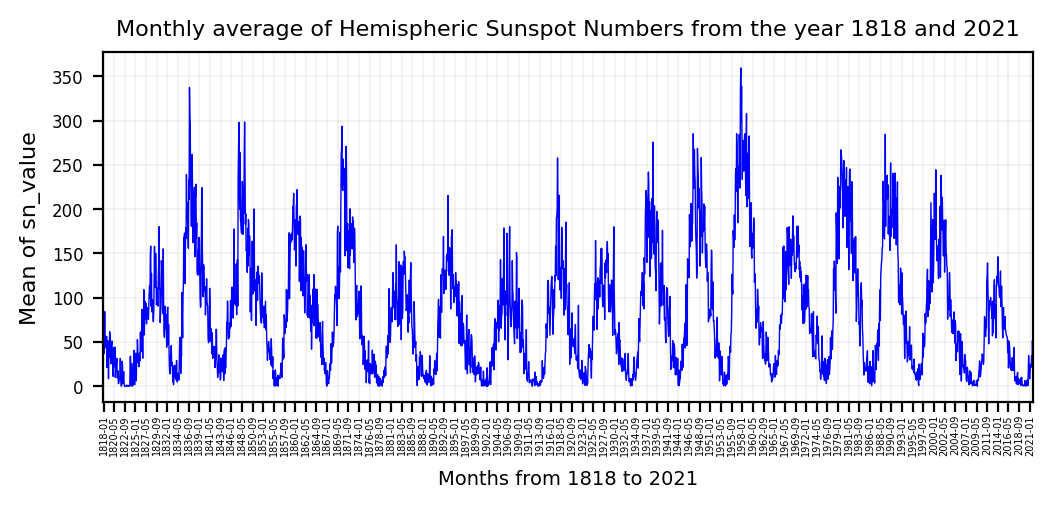

In [8]:
font = {'size'   :6 }
plt.rc('font', **font)
fig=plt.figure(figsize=(6, 5), dpi= 200, facecolor='w', edgecolor='k')
ax1=plt.subplot(2,1,1) 

date=df_sunspot_gb['date'].astype(str).values.tolist()
sn_value=df_sunspot_gb['sn_value'].values.tolist()
df_sunspot_gb.insert(loc=0, column='No.', value=np.arange(1,len(sn_value)+1))
plt.plot(date,sn_value,color='b',linewidth=0.5)
ax1.grid(axis='both',linewidth='0.1')
plt.xticks(np.arange(1,len(date)+1),date)
ax1.set_xticklabels(date, rotation=90,fontsize=3.5,y=0.02)
plt.title('Monthly average of Hemispheric Sunspot Numbers from the year 1818 and 2021',fontsize=8)

plt.xlabel('Months from 1818 to 2021',fontsize=7,labelpad=5)
plt.ylabel('Mean of sn_value',fontsize=8)
plt.locator_params(axis='x', nbins=90)
plt.xlim(('1818-01','2021-11'))
plt.show()

## Training and Test sets

In [9]:
# Training set for years less than 2021
X_train = df_sunspot_gb[df_sunspot_gb.date<'2021']
X_train.reset_index(drop=True, inplace=True)

# Test set for the year 2021
X_test = df_sunspot_gb[(df_sunspot_gb.date>'2021') & (df_sunspot_gb.date<'2022')]
X_test.reset_index(drop=True, inplace=True)

## Prediction with Supervised Learning

### Convert Time Series to Supervised Learning Problem 

Before machine learning can be used, time series forecasting problems must be re-framed as supervised learning problems. From a sequence to pairs of input and output sequences.

A time series is a sequence of numbers that are ordered by a time index. This can be thought of as a list or column of ordered values.

A supervised learning problem is comprised of input patterns (X) and output patterns (y), such that an algorithm can learn how to predict the output patterns from the input patterns.

Further, the shift function also works on so-called multivariate time series problems. **That is where instead of having one set of observations for a time series, we have multiple (e.g. temperature and pressure)**. All variates in the time series can be shifted forward or backward to create multivariate input and output sequences. 

<p>&nbsp;</p>
<img src="https://raw.githubusercontent.com/MehdiRezvandehy/Machine-Learning-Course-University-of-Calgary/master/Images/1-timeseries_workflow.png" alt="drawing" width="400"/>
<p>&nbsp;</p>

<p>&nbsp;</p>
<img src="https://raw.githubusercontent.com/MehdiRezvandehy/Machine-Learning-Course-University-of-Calgary/master/Images/2-timeseries_workflow.png" alt="drawing" width="400"/>
<p>&nbsp;</p>

<p>&nbsp;</p>
<img src="https://raw.githubusercontent.com/MehdiRezvandehy/Machine-Learning-Course-University-of-Calgary/master/Images/3-timeseries_workflow.png" alt="drawing" width="400"/>
<p>&nbsp;</p>

Now machine learning supervised learning can be applied of training feature to predict target which is future data. Function `time_series_forecst` automatically convent a time series to supervised learning and apply prediction with  a selected model. Example below applies convert X_train time series to supervised learning to 12 input and 6 output. `LinearRegression()` is applied for prediction supervised learning.

In [10]:
# Train LinearRegression
n_input=12 # 12 Months input
n_output=6 # 6 Months output
nsim=1
model=LinearRegression()
pred_no_all,full_test_nsim_all,full_test_nsim_m,MAE_all=time_series_forecst(n_input,n_output
                    ,nsim, model,X_train,clm='sn_value',no='No.',test1=X_test)

### Cross-Validation on Time-Series data

**A better alternative for cross validation on time series data (than K-fold CV) is Forward Chaining strategy.**

In forward chaining, say with 3 folds, the train and validation sets look like:
* fold 1: training [1], validation [2]
* fold 2: training [1 2], validation [3]
* fold 3: training [1 2 3], validation [4]

**sklearn has a provision for implementing such train test split using `TimeSeriesSplit`.**

The `TimeSerieSplit` function takes as input the number of splits. Since our training data has 11 unique years (2006 -2016), we would be setting `n_splits = 10`. This way we have neat training and validation sets:

* fold 1: training [2006], validation [2007]
* fold 2: training [2006 2007], validation [2008]
* fold 3: training [2006 2007 2008], validation [2009]
* fold 4: training [2006 2007 2008 2009], validation [2010]
* fold 5: training [2006 2007 2008 2009 2010], validation [2011]
* fold 6: training [2006 2007 2008 2009 2010 2011], validation [2012]
* fold 7: training [2006 2007 2008 2009 2010 2011 2012], validation [2013]
* fold 8: training [2006 2007 2008 2009 2010 2011 2012 2013], validation [2014]
* fold 9: training [2006 2007 2008 2009 2010 2011 2012 2013 2014], validation [2015]
* fold 10: training [2006 2007 2008 2009 2010 2011 2012 2013 2014 2015], validation [2016]

### Predictive Algorithms 

Linear Regression: 0.783453 (0.054053)
Neural Network: 0.761898 (0.082538)
Decision Tree: 0.532434 (0.112555)
Random Forest: 0.773341 (0.055610)


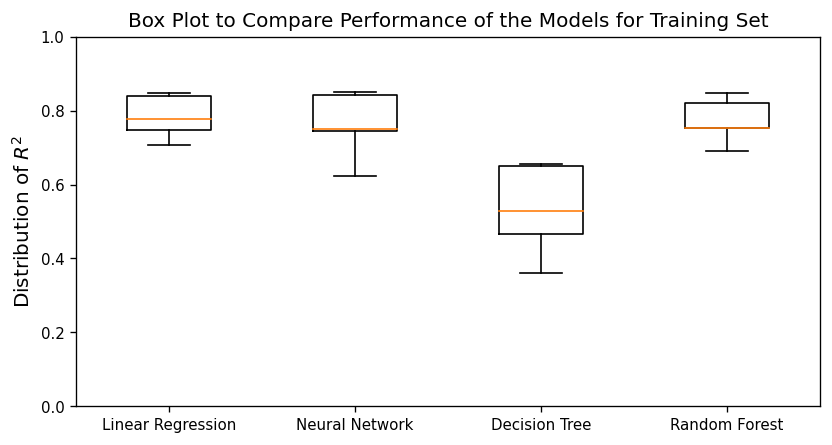

In [11]:
font = {'size'   : 9}
plt.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(8, 4), dpi= 120, facecolor='w', edgecolor='k')

# Spot Check Algorithms
np.random.seed(42) 
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Neural Network', MLPRegressor(solver = 'lbfgs',hidden_layer_sizes=500,early_stopping=True)))
models.append(('Decision Tree', DecisionTreeRegressor())) 
models.append(('Random Forest', RandomForestRegressor(n_estimators = 100))) 

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=5)
    
    # Convert time series to suppervised learning:
    train_ts= df_Series_to_Supervised(X_train[['sn_value']], n_input=n_input,n_output=n_output, remove_nan=True)
    target_clmn=train_ts.columns[-n_output:]
    X_train_ts = train_ts.drop(target_clmn, axis = 1)
    y_train_ts = train_ts[target_clmn]
    
    cv_results = cross_val_score(model, X_train_ts, y_train_ts, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.ylim((0,1))
plt.boxplot(results,meanline=True, labels=names)
plt.ylabel('Distribution of '+r"$R^{2}$",fontsize=12)
plt.title('Box Plot to Compare Performance of the Models for Training Set',fontsize=12)
plt.show()

In [12]:
# Number of simulations. Future prediction requires nsim>1
nsim = 50

In [13]:
# Make empty sn_value for year 2022
test_2022=[f'2022-{"%02d" % (i+1,)}' for i in range(12)]
test_2022=pd.DataFrame(test_2022,columns=['date'])
test_2022['sn_value']=len(test_2022)*[np.nan]
#
# Make empty sn_value for year 2023
test_2023=[f'2023-{"%02d" % (i+1,)}' for i in range(12)]
test_2023=pd.DataFrame(test_2023,columns=['date'])
test_2023['sn_value']=len(test_2023)*[np.nan]
#
# Make empty sn_value for year 2024
test_2024=[f'2024-{"%02d" % (i+1,)}' for i in range(12)]
test_2024=pd.DataFrame(test_2024,columns=['date'])
test_2024['sn_value']=len(test_2024)*[np.nan]
#
# Make empty sn_value for year 2025
test_2025=[f'2025-{"%02d" % (i+1,)}' for i in range(12)]
test_2025=pd.DataFrame(test_2025,columns=['date'])
test_2025['sn_value']=len(test_2025)*[np.nan]

In [14]:
# LinearRegression
model=LinearRegression()
pred_no_all,full_test_nsim_all_lr,full_test_nsim_m_lr,MAE_all_lr,X_train_ts_lr, y_train_ts_lr=time_series_forecst(n_input,n_output
                    ,nsim, model,X_train,clm='sn_value',no='No.', data_out=True,test1=X_test,
                    test2=test_2022,test3=test_2023,test4=test_2024,test5=test_2025)   
# RandomForestRegressor
model=RandomForestRegressor()
pred_no_all,full_test_nsim_all_rf,full_test_nsim_m_rf,MAE_all_rf,X_train_ts_rf, y_train_ts_rf=time_series_forecst(n_input,n_output
                    ,nsim, model,X_train,clm='sn_value',no='No.', data_out=True,test1=X_test,
                    test2=test_2022,test3=test_2023,test4=test_2024,test5=test_2025)   
# MLPRegressor
model=MLPRegressor(solver = 'lbfgs',hidden_layer_sizes=500,early_stopping=True)
pred_no_all,full_test_nsim_all_ml,full_test_nsim_m_ml,MAE_all_ml,X_train_ts_ml, y_train_ts_ml=time_series_forecst(n_input,n_output
                    ,nsim, model,X_train,clm='sn_value',no='No.', data_out=True,test1=X_test,
                    test2=test_2022,test3=test_2023,test4=test_2024,test5=test_2025)   
# DecisionTreeRegressor
model=DecisionTreeRegressor()
pred_no_all,full_test_nsim_all_dt,full_test_nsim_m_dt,MAE_all_dt,X_train_ts_dt, y_train_ts_dt=time_series_forecst(n_input,n_output
                    ,nsim, model,X_train,clm='sn_value',no='No.', data_out=True,test1=X_test,
                    test2=test_2022,test3=test_2023,test4=test_2024,test5=test_2025)  

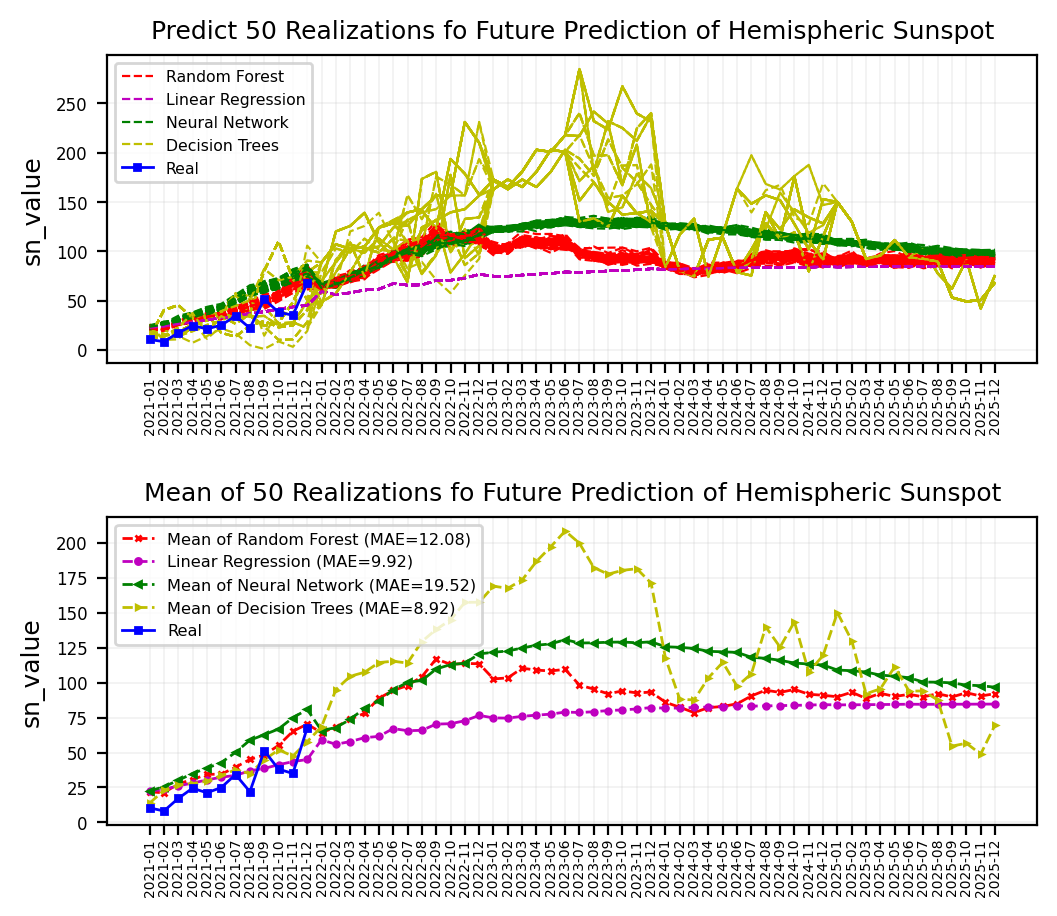

In [15]:
date=X_test['date'].astype(str).values.tolist()+test_2022['date'
            ].astype(str).values.tolist()+test_2023['date'].astype(str).values.tolist()+test_2024['date'
            ].astype(str).values.tolist()+test_2025['date'].astype(str).values.tolist()

date_real=X_test['sn_value'].to_list()+test_2022['sn_value'].to_list()+test_2023['sn_value'
            ].to_list()+test_2024['sn_value'].to_list()+test_2025['sn_value'].to_list()
    
font = {'size'   :6 }
plt.rc('font', **font)
fig=plt.figure(figsize=(6, 5), dpi= 200, facecolor='w', edgecolor='k')
ax1=plt.subplot(2,1,1) 

# Number of prediction
n_pred= 5  # 2021, 2022, 2023, 2024, 2025
# Make realizations 
for i in range(nsim):
    real_rf=[]
    real_lr=[]
    real_ml=[]
    real_dt=[]    
    for j in range(n_pred):
        real_rf=real_rf+full_test_nsim_all_rf[j][i]
        real_lr=real_lr+full_test_nsim_all_lr[j][i]
        real_ml=real_ml+full_test_nsim_all_ml[j][i]
        real_dt=real_dt+full_test_nsim_all_dt[j][i]   
    if i==0: 
        label_rf='Random Forest'
        label_lr='Linear Regression'
        label_ml='Neural Network'
        label_dt='Decision Trees'           
    else: 
        label_rf= None
        label_lr= None
        label_ml= None
        label_dt= None      
    plt.plot(np.ravel(pred_no_all),real_rf,'r--',linewidth=0.8,label=label_rf)
    plt.plot(np.ravel(pred_no_all),real_lr,'m--',linewidth=0.8,label=label_lr)
    plt.plot(np.ravel(pred_no_all),real_ml,'g--',linewidth=0.8,label=label_ml)
    plt.plot(np.ravel(pred_no_all),real_dt,'y--',linewidth=0.8,label=label_dt)
    
plt.plot(np.ravel(pred_no_all),date_real,'bs-',markersize=2,linewidth=1.0,label='Real')  
ax1.grid(axis='both',linewidth='0.1')
plt.title(f"Predict {nsim} Realizations fo Future Prediction of Hemispheric Sunspot",fontsize=9)
plt.ylabel('sn_value',fontsize=9)
plt.xticks(np.ravel(pred_no_all), date,rotation=90,fontsize=5,y=0.02)
plt.legend(loc=2,fontsize=5.7,markerscale=1.1)

ax1=plt.subplot(2,1,2) 

# Mean of realizations    
plt.plot(np.ravel(pred_no_all),np.ravel(full_test_nsim_m_rf),'rx--',markersize=2,
         linewidth=1.0,label=f'Mean of Random Forest (MAE={np.round(MAE_all_rf,2)})')
plt.plot(np.ravel(pred_no_all),np.ravel(full_test_nsim_m_lr),'mo--',markersize=2,
         linewidth=1.0,label=f'Linear Regression (MAE={np.round(MAE_all_lr,2)})')
plt.plot(np.ravel(pred_no_all),np.ravel(full_test_nsim_m_ml),'g<--',markersize=2,
         linewidth=1.0,label=f'Mean of Neural Network (MAE={np.round(MAE_all_ml,2)})')
plt.plot(np.ravel(pred_no_all),np.ravel(full_test_nsim_m_dt),'y>--',markersize=1.5,
         linewidth=1.0,label=f'Mean of Decision Trees (MAE={np.round(MAE_all_dt,2)})')
plt.plot(np.ravel(pred_no_all),date_real,
         'bs-',markersize=2,linewidth=1.0,label='Real')    
ax1.grid(axis='both',linewidth='0.1')
plt.title(f"Mean of {nsim} Realizations fo Future Prediction of Hemispheric Sunspot",fontsize=9)
plt.ylabel('sn_value',fontsize=9)
plt.xticks(np.ravel(pred_no_all), date,rotation=90,fontsize=5,y=0.02)
plt.legend(loc=2,fontsize=5.8,markerscale=1.1)
plt.subplots_adjust(hspace=0.5)

plt.show()

## Deep Learning

### Recurrent Neural Network (RNN)

* **What are Recurrent Neural Networks (RNN)**


RNN is the type of artificial neural network (ANN) used in Apple’s Siri and Google’s voice search. It remembers past inputs due to an internal memory which is useful for time series forecasting such as stock prices, generating text, transcriptions, and machine translation.
  
The inputs and the outputs are independent of each other in the traditional NN, while the output in RNN is dependent on prior elementals within the sequence. Recurrent networks also share parameters across each layer of the network. In feedforward networks, there are different weights across each node. 

At each time step t (also called a frame), recurrent neuron receives the inputs x(t) as well as its own output from the previous time step, y(t-1) . Since there is no previous output at the first time step, it is generally set to 0 (see Figure below)

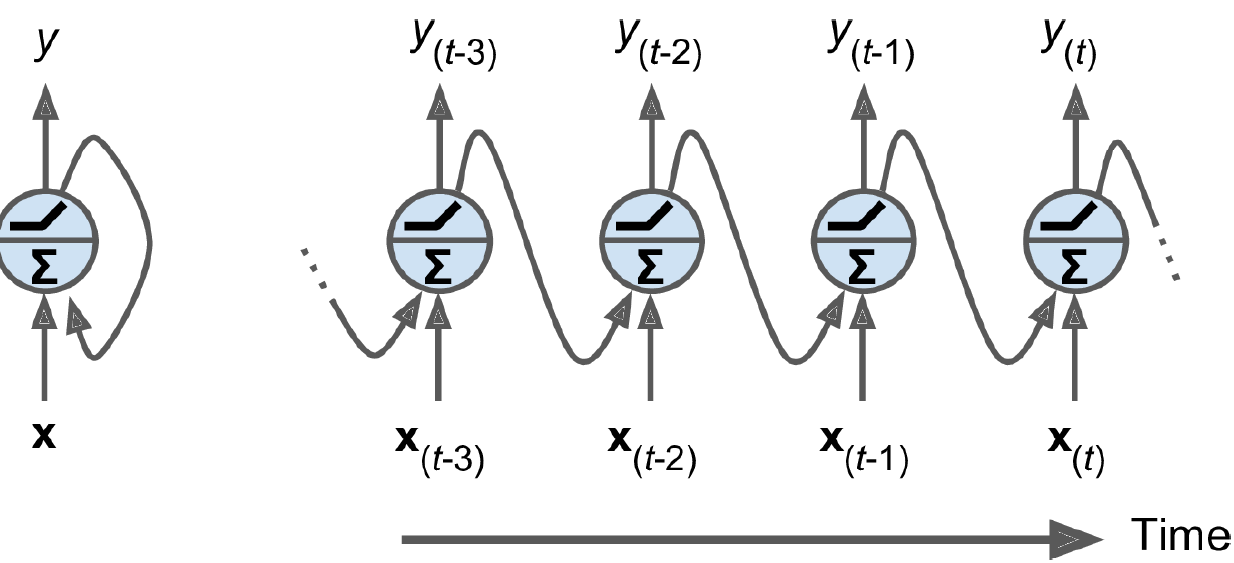




At each time step t, every neuron receives both the input vector x(t) and the output vector from the previous time step y(t-1). The equation below shows output for a single instance:

$y(t)= \phi(\textbf{W}_{x}^{T}x(t)+\textbf{W}_{y}^{T}y(t-1)+b)$

where $\phi$ is activation function and b is bias term.

This is the main difference between traditional neural network and RNN.



Instead of using traditional backpropagation, recurrent neural networks use backpropagation through time (BPTT) algorithms to determine the gradient. In backpropagation, the model adjusts the parameter by calculating errors from the output to the input layer. 

* **Types of Recurrent Neural Networks**

Feedforward networks have single input and output. However, recurrent neural networks are flexible as the length of inputs and outputs can be changed. This flexibility helps to sentiment classification, generate music and translation.

Here are four types of RNN based on different lengths of inputs and outputs.

* **One-to-one**:  a simple neural network, for machine learning problems that have a single input and output.

* **One-to-many**: a single input and multiple outputs, for generating image captions.

* **Many-to-one**: a sequence of multiple inputs and predicts a single output, for sentiment classification, where the input is text and the output is a category.

* **Many-to-many** multiple inputs and outputs, for machine translation.
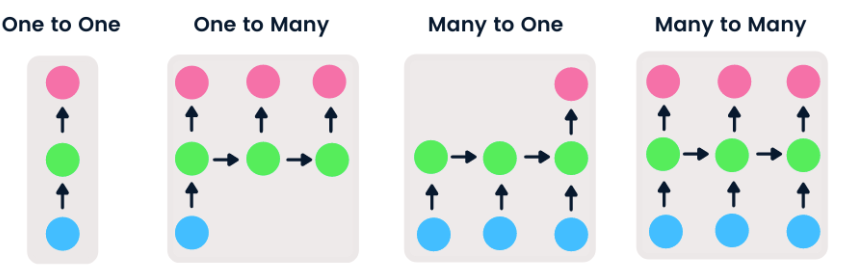

The strategy to train RNN is called **backpropagation through time (BPTT)**. Similar to regular backpropagation, first there is a feed forward pass (represented by the dashed arrows in Figure below). Then the output sequence is evaluated using a cost function C(Y(0) , Y(1) , …Y(T) ) (T is the max time step). The gradients of that cost function are then propagated backward through the network (represented by the solid arrows below). The model parameters are updated using the gradients computed during BPTT. 
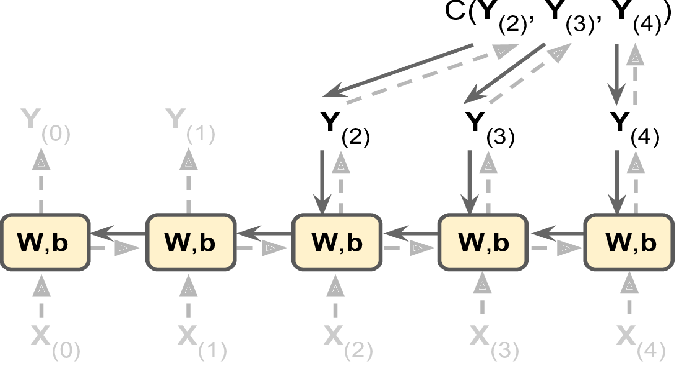

When dealing with time series (and other types of sequences such as sentences), the input features are generally represented as 3D arrays of shape **[batch size (number of time series), time steps, dimensionality]**, where dimensionality is 1 for univariate time series and more for multivariate time series.**

In [16]:
# Training set for years less than 2021
X_train = df_sunspot_gb[df_sunspot_gb.date<'2021']
X_train.reset_index(drop=True, inplace=True)

# Test set for the year 2021
X_test = df_sunspot_gb[(df_sunspot_gb.date>'2021') & (df_sunspot_gb.date<'2022')]
X_test.reset_index(drop=True, inplace=True)

In [17]:
pred_no_all,full_test_nsim_all_rnn,full_test_nsim_m_rnn,MAE_all_rnn,X_train_ts_rnn,\
              y_train_ts_rnn=time_series_forecst(n_input,n_output,nsim, model,X_train,clm='sn_value',
              no='No.', data_out=True,deep_learning='rnn',activation='tanh',hl1=50,hl2=35,epochs=20,
              test1=X_test,test2=test_2022,test3=test_2023,test4=test_2024,test5=test_2025)   
clear_output(wait=False)

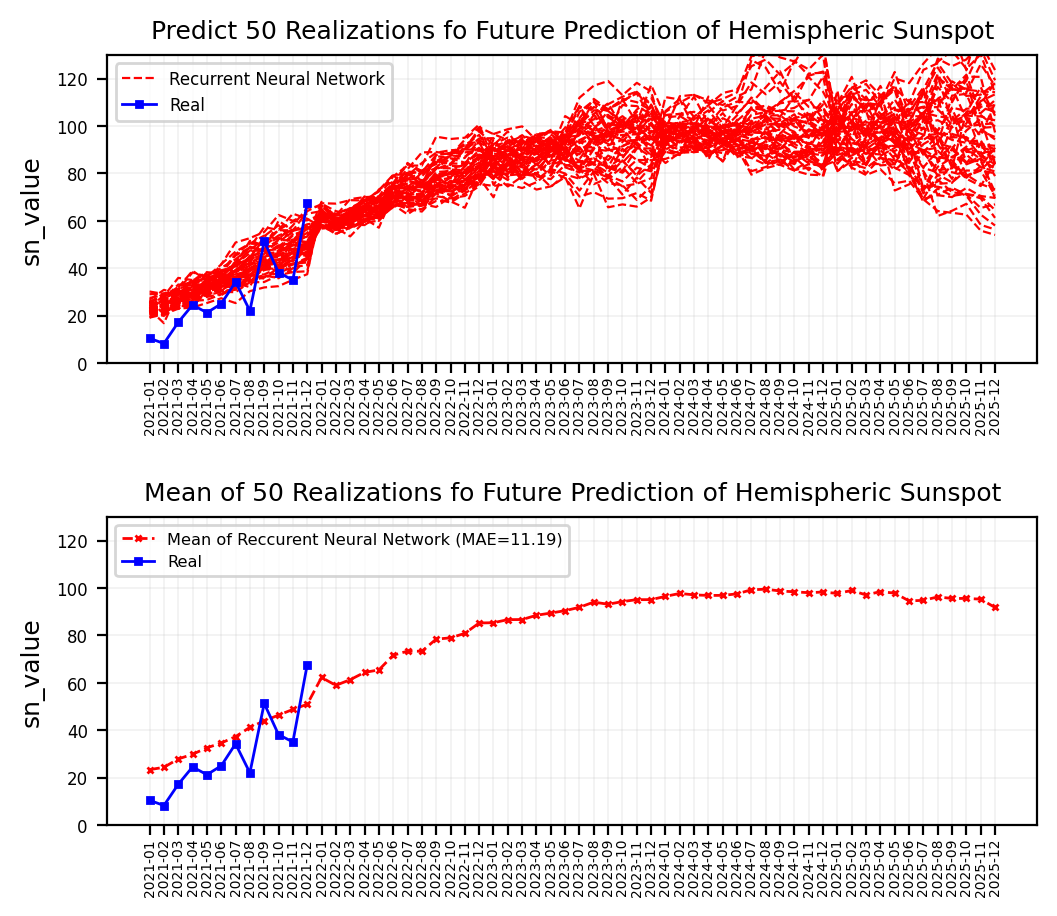

In [18]:
date=X_test['date'].astype(str).values.tolist()+test_2022['date'
            ].astype(str).values.tolist()+test_2023['date'].astype(str).values.tolist()+test_2024['date'
            ].astype(str).values.tolist()+test_2025['date'].astype(str).values.tolist()

date_real=X_test['sn_value'].to_list()+test_2022['sn_value'].to_list()+test_2023['sn_value'
            ].to_list()+test_2024['sn_value'].to_list()+test_2025['sn_value'].to_list()
font = {'size'   :6 }
plt.rc('font', **font)
fig=plt.figure(figsize=(6, 5), dpi= 200, facecolor='w', edgecolor='k')
ax1=plt.subplot(2,1,1) 

# Make realizations 
for i in range(nsim):
    real=[]
    for j in range(n_pred):
        real=real+full_test_nsim_all_rnn[j][i]
    if i==0: 
        label='Recurrent Neural Network'
    else: 
        label= None
    plt.plot(np.ravel(pred_no_all),real,'r--',linewidth=0.8,label=label)
    
plt.plot(np.ravel(pred_no_all),date_real,'bs-',markersize=2,linewidth=1.0,label='Real')  
ax1.grid(axis='both',linewidth='0.1')
plt.title(f"Predict {nsim} Realizations fo Future Prediction of Hemispheric Sunspot",fontsize=9)
plt.ylabel('sn_value',fontsize=9)
plt.xticks(np.ravel(pred_no_all), date,rotation=90,fontsize=5,y=0.02)
plt.legend(loc=2,fontsize=6,markerscale=1.1)
plt.ylim(0,130)
ax1=plt.subplot(2,1,2) 

# Mean of realizations    
plt.plot(np.ravel(pred_no_all),np.ravel(full_test_nsim_m_rnn),'rx--',markersize=2,
         linewidth=1.0,label=f'Mean of Reccurent Neural Network (MAE={np.round(MAE_all_rnn,2)})')

plt.plot(np.ravel(pred_no_all),date_real,
         'bs-',markersize=2,linewidth=1.0,label='Real')    
ax1.grid(axis='both',linewidth='0.1')
plt.title(f"Mean of {nsim} Realizations fo Future Prediction of Hemispheric Sunspot",fontsize=9)
plt.ylabel('sn_value',fontsize=9)
plt.xticks(np.ravel(pred_no_all), date,rotation=90,fontsize=5,y=0.02)
plt.legend(loc=2,fontsize=5.8,markerscale=1.1)
plt.ylim(0,130)
plt.subplots_adjust(hspace=0.5)

plt.show()

### LSTM (Long Short-Term Memory) 

The main problem with RNN are 1-**Vanishing Gradient** that occurs when the gradient becomes so small this leads to the algorithm stops learning. 2- **Exploding Gradient** that occurs when the gradient becomes too large, which makes the model unstable. 

The Long Short Term Memory (LSTM) is the advanced type of RNN, which was designed to prevent both vanishing and exploding gradient problems. Similar to RNN, LSTM has repeating modules, but with different structure. Instead of having a single layer of activation layer (tanh), LSTM has four interacting layers that communicate with each other. This four-layered structure helps LSTM retain long-term memory.

In [19]:
pred_no_all,full_test_nsim_all_lstm,full_test_nsim_m_lstm,MAE_all_lstm,X_train_ts_lstm,\
                 y_train_ts_lstm=time_series_forecst(n_input,n_output,nsim, model,X_train,clm='sn_value',
                 no='No.', data_out=True,deep_learning='lstm',activation='tanh',hl1=50,hl2=35,epochs=20,
                 test1=X_test,test2=test_2022,test3=test_2023,test4=test_2024,test5=test_2025)   

clear_output(wait=False)

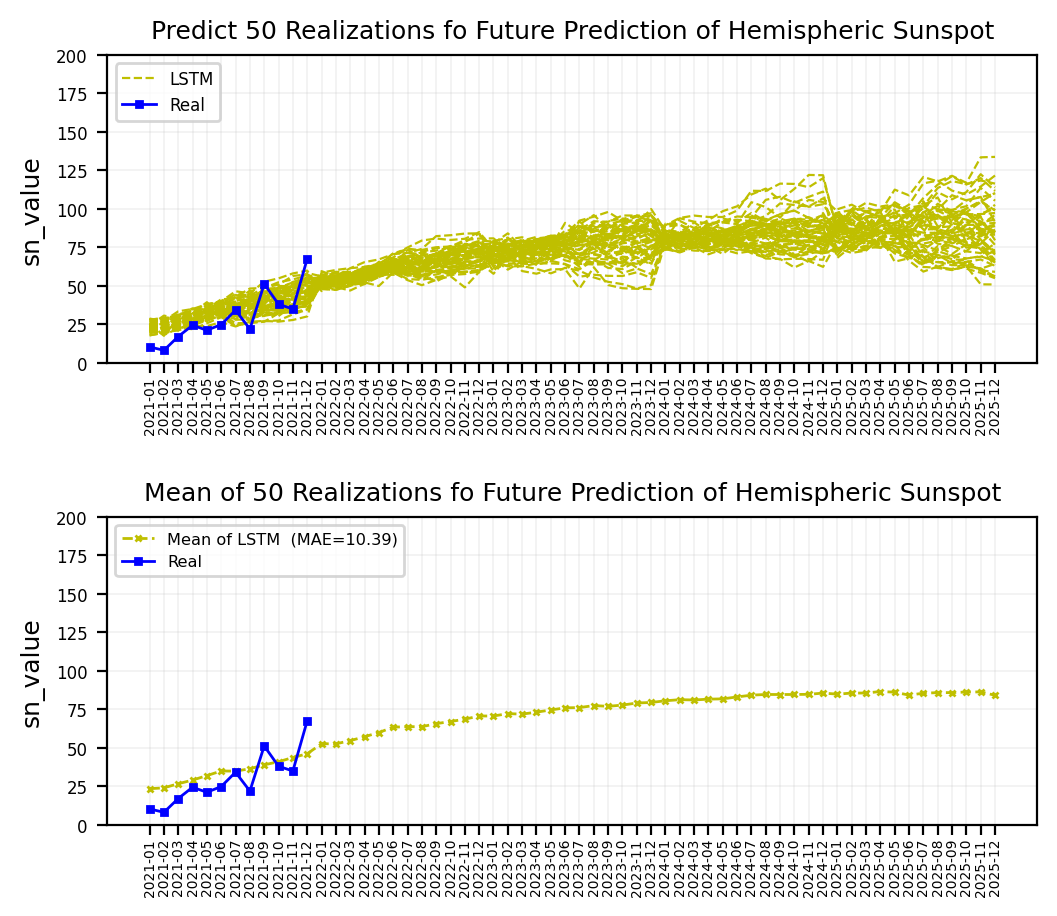

In [20]:
date=X_test['date'].astype(str).values.tolist()+test_2022['date'
            ].astype(str).values.tolist()+test_2023['date'].astype(str).values.tolist()+test_2024['date'
            ].astype(str).values.tolist()+test_2025['date'].astype(str).values.tolist()

date_real=X_test['sn_value'].to_list()+test_2022['sn_value'].to_list()+test_2023['sn_value'
            ].to_list()+test_2024['sn_value'].to_list()+test_2025['sn_value'].to_list()
    
font = {'size'   :6 }
plt.rc('font', **font)
fig=plt.figure(figsize=(6, 5), dpi= 200, facecolor='w', edgecolor='k')
ax1=plt.subplot(2,1,1) 

# Number of prediction
n_pred= 5
# Make realizations 
for i in range(nsim):
    real=[]
    for j in range(n_pred):
        real=real+full_test_nsim_all_lstm[j][i]
    if i==0: 
        label='LSTM'
    else: 
        label= None
    plt.plot(np.ravel(pred_no_all),real,'y--',linewidth=0.8,label=label)
    
plt.plot(np.ravel(pred_no_all),date_real,'bs-',markersize=2,linewidth=1.0,label='Real')  
ax1.grid(axis='both',linewidth='0.1')
plt.title(f"Predict {nsim} Realizations fo Future Prediction of Hemispheric Sunspot",fontsize=9)
plt.ylabel('sn_value',fontsize=9)
plt.xticks(np.ravel(pred_no_all), date,rotation=90,fontsize=5,y=0.02)
plt.legend(loc=2,fontsize=6,markerscale=1.1)
plt.ylim(0,200)

ax1=plt.subplot(2,1,2) 

# Mean of realizations    
plt.plot(np.ravel(pred_no_all),np.ravel(full_test_nsim_m_lstm),'yx--',markersize=2,
         linewidth=1.0,label=f'Mean of LSTM  (MAE={np.round(MAE_all_lstm,2)})')

plt.plot(np.ravel(pred_no_all),date_real,
         'bs-',markersize=2,linewidth=1.0,label='Real')    

ax1.grid(axis='both',linewidth='0.1')
plt.title(f"Mean of {nsim} Realizations fo Future Prediction of Hemispheric Sunspot",fontsize=9)
plt.ylabel('sn_value',fontsize=9)
plt.xticks(np.ravel(pred_no_all), date,rotation=90,fontsize=5,y=0.02)
plt.legend(loc=2,fontsize=5.8,markerscale=1.1)
plt.ylim(0,200)
plt.subplots_adjust(hspace=0.5)

plt.show()

### Gated Recurrent Unit (GRU)

The gated recurrent unit (GRU) is a variation of LSTM as both have design similarities, and in some cases, they produce similar results. GRU uses an update gate and reset gate to solve the vanishing gradient problem. These gates decide what information is important and pass it to the output. The gates can be trained to store information from long ago, without vanishing over time or removing irrelevant information. See [towardsdatascience](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be) for more information.

In [21]:
pred_no_all,full_test_nsim_all_gru,full_test_nsim_m_gru,MAE_all_gru,X_train_ts_gru,\
                 y_train_ts_gru=time_series_forecst(n_input,n_output,nsim, model,X_train,clm='sn_value',
                 no='No.', data_out=True,deep_learning='gru',activation='tanh',hl1=50,hl2=35,epochs=20,
                 test1=X_test,test2=test_2022,test3=test_2023,test4=test_2024,test5=test_2025)   

clear_output(wait=False)

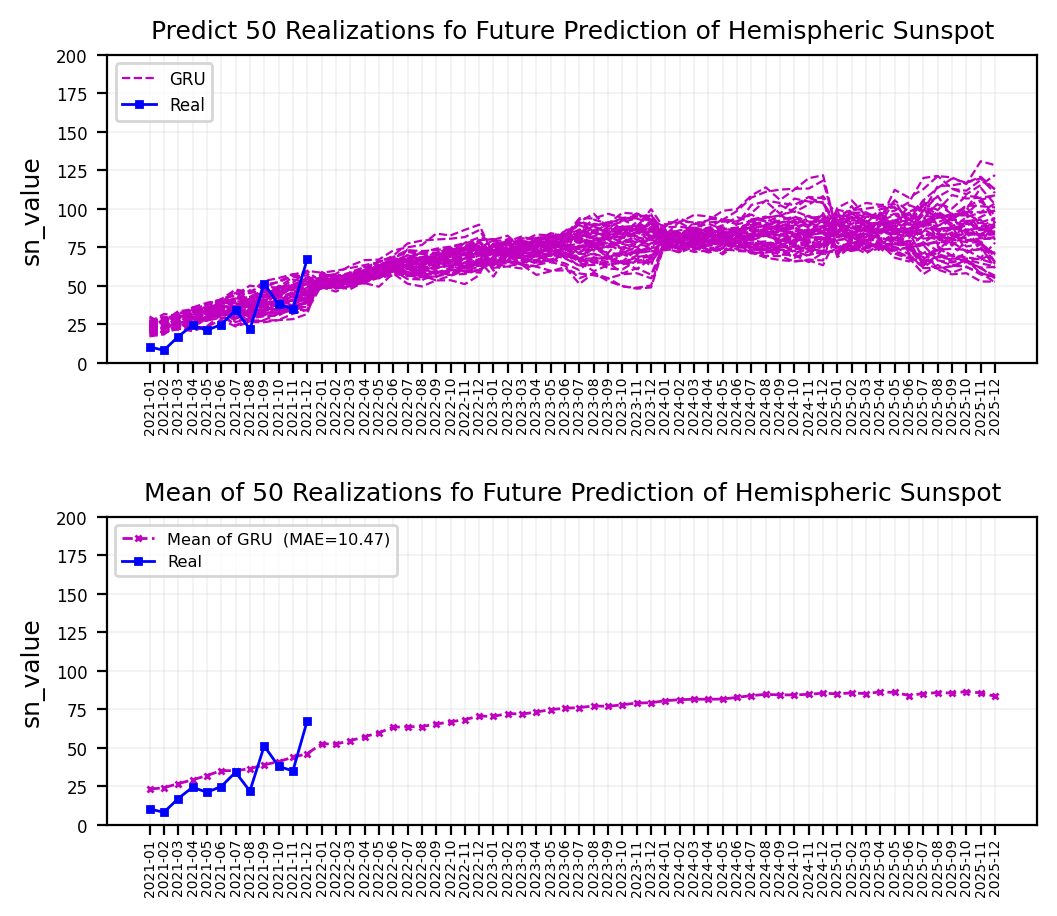

In [22]:
date=X_test['date'].astype(str).values.tolist()+test_2022['date'
            ].astype(str).values.tolist()+test_2023['date'].astype(str).values.tolist()+test_2024['date'
            ].astype(str).values.tolist()+test_2025['date'].astype(str).values.tolist()

date_real=X_test['sn_value'].to_list()+test_2022['sn_value'].to_list()+test_2023['sn_value'
            ].to_list()+test_2024['sn_value'].to_list()+test_2025['sn_value'].to_list()
    
font = {'size'   :6 }
plt.rc('font', **font)
fig=plt.figure(figsize=(6, 5), dpi= 200, facecolor='w', edgecolor='k')
ax1=plt.subplot(2,1,1) 

# Make realizations 
for i in range(nsim):
    real=[]
    for j in range(n_pred):
        real=real+full_test_nsim_all_gru[j][i]
    if i==0: 
        label='GRU'
    else: 
        label= None
    plt.plot(np.ravel(pred_no_all),real,'m--',linewidth=0.8,label=label)
    
plt.plot(np.ravel(pred_no_all),date_real,'bs-',markersize=2,linewidth=1.0,label='Real')  
ax1.grid(axis='both',linewidth='0.1')
plt.title(f"Predict {nsim} Realizations fo Future Prediction of Hemispheric Sunspot",fontsize=9)
plt.ylabel('sn_value',fontsize=9)
plt.xticks(np.ravel(pred_no_all), date,rotation=90,fontsize=5,y=0.02)
plt.legend(loc=2,fontsize=6,markerscale=1.1)
plt.ylim(0,200)

ax1=plt.subplot(2,1,2) 

# Mean of realizations    
plt.plot(np.ravel(pred_no_all),np.ravel(full_test_nsim_m_gru),'mx--',markersize=2,
         linewidth=1.0,label=f'Mean of GRU  (MAE={np.round(MAE_all_gru,2)})')

plt.plot(np.ravel(pred_no_all),date_real,
         'bs-',markersize=2,linewidth=1.0,label='Real')    

ax1.grid(axis='both',linewidth='0.1')
plt.title(f"Mean of {nsim} Realizations fo Future Prediction of Hemispheric Sunspot",fontsize=9)
plt.ylabel('sn_value',fontsize=9)
plt.xticks(np.ravel(pred_no_all), date,rotation=90,fontsize=5,y=0.02)
plt.legend(loc=2,fontsize=5.8,markerscale=1.1)
plt.ylim(0,200)
plt.subplots_adjust(hspace=0.5)

plt.show()

## Uncertainty Assessment for Prediction at 2025-12

Recurrent Neural Network (RNN) has the lowest MAE with actual values. Multiple simulations of RNN at 2023-12-01 are applied for uncertainty assessment.

In [23]:
forecasting=[ii[-1] for ii in full_test_nsim_all_rnn[-1]]

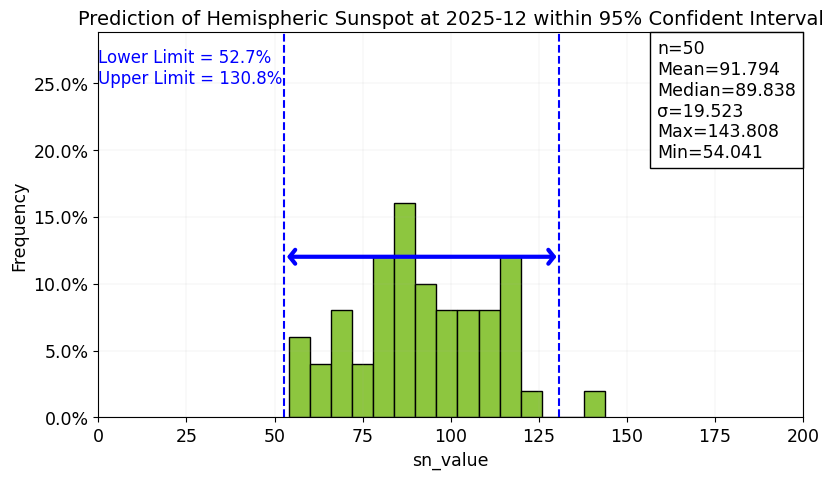

In [24]:
fig, ax1 = plt.subplots(figsize=(20,5), dpi= 100, facecolor='w', edgecolor='k')
ax1=plt.subplot(1,2,1) 

m=np.mean(forecasting)      
vr= np.var(forecasting)     
sd_m=np.sqrt(vr)
low_lim_t=m-2*sd_m
up_lim_t=m+2*sd_m

EDA_plot.histplt (forecasting,bins=15,title=f'Prediction of Hemispheric Sunspot at 2025-12 within 95% Confident Interval',
                  xlabl='sn_value',ylabl='Frequency',xlimt=(0,200),ylimt=(0,0.25),axt=ax1,
                   scale=1.25,loc=1,font=10,color='#8DC63F')
plt.annotate(text='', xy=(low_lim_t,0.12), xytext=(up_lim_t,0.12), 
             arrowprops=dict(arrowstyle='<->, head_width=0.5',lw=3,color='b'))
#plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.axvline(x=low_lim_t,linestyle='--',color='b')
plt.axvline(x=up_lim_t,linestyle='--',color='b')
txt= f'Lower Limit = {np.round(low_lim_t,1)}% \nUpper Limit = {np.round(up_lim_t,1)}% '

x0, xmax = plt.xlim()
y0, ymax = plt.ylim()
plt.text(x0 , ymax, txt, color='b',fontsize=12)
plt.ylim(0,ymax+ymax*0.15)   
plt.show()

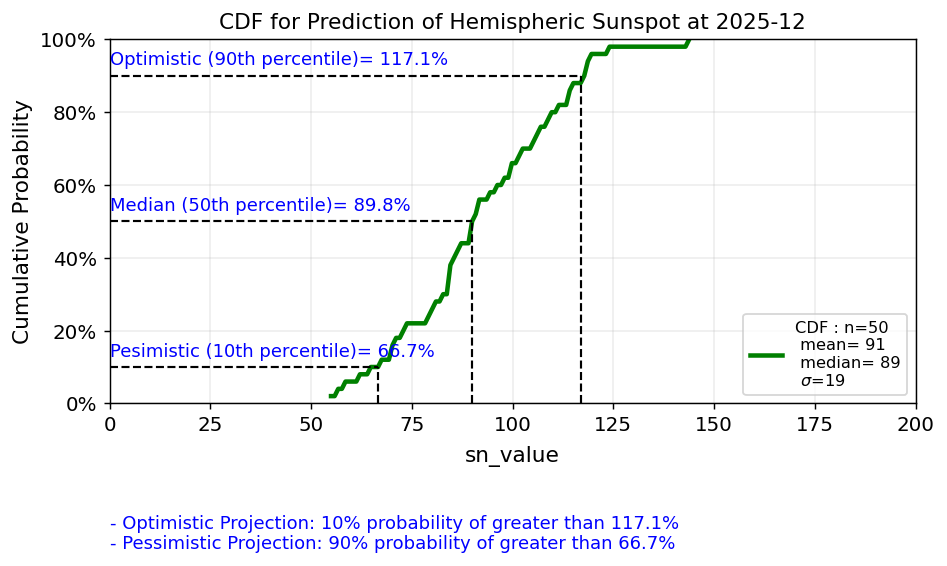

In [25]:
font = {'size'   : 11}
plt.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(8, 8), dpi= 130, facecolor='w', edgecolor='k')

ax1=plt.subplot(2,1,1)
title=f'CDF for Prediction of Hemispheric Sunspot at 2025-12'
EDA_plot.CDF_plot(forecasting,1,label='CDF',colors='g',xlabel='sn_value',
                  title=title,ylabel='Cumulative Probability',bins=100,xlim=(0,200),ylim=(0,1),
                  linewidth=2.5,loc=4,axt=ax1,x_ftze=12,y_ftze=12,tit_ftze=12,leg_ftze=9)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
x0, xmax = plt.xlim()
y0, ymax = plt.ylim()

# 10th percentile
per=0.1
Perctile_10=np.quantile(forecasting, per, axis=0, keepdims=True)[0]
txt= 'Pesimistic (10th percentile)= '
txt+=f'{np.round(Perctile_10,1)}%'
plt.plot([x0, Perctile_10], [per, per], 'k--', linewidth=1.2)
plt.plot([Perctile_10, Perctile_10], [y0, per], 'k--', linewidth=1.2)
plt.text(x0, per+0.03, txt, color='b',
         fontsize=10)

# 50th percentile
per=0.5
Perctile=np.quantile(forecasting, per, axis=0, keepdims=True)[0]
txt= 'Median (50th percentile)= '
txt+=f'{np.round(Perctile,1)}%'
plt.plot([x0, Perctile], [per, per], 'k--', linewidth=1.2)
plt.plot([Perctile, Perctile], [y0, per], 'k--', linewidth=1.2)
plt.text(x0, per+0.03, txt, color='b',
         fontsize=10)

# 90th percentile
per=0.9
Perctile_90=np.quantile(forecasting, per, axis=0, keepdims=True)[0]
txt= 'Optimistic (90th percentile)= '
txt+=f'{np.round(Perctile_90,1)}%'
plt.plot([x0, Perctile_90], [per, per], 'k--', linewidth=1.2)
plt.plot([Perctile_90, Perctile_90], [y0, per], 'k--', linewidth=1.2)
plt.text(x0, per+0.03, txt, color='b',
         fontsize=10)

txt=f"""- Optimistic Projection: 10% probability of greater than {np.round(Perctile_90,1)}% 
- Pessimistic Projection: 90% probability of greater than {np.round(Perctile_10,1)}%"""
plt.text(x0, -0.4, txt, color='b',
         fontsize=10)
plt.show()

# Total Energy Consumption in Alberta

Another data set for time series forecasting in this notebook is Total Energy Consumption in Alberta. The data can be downloaded from this [link](https://www.aeso.ca/market/market-and-system-reporting/) by clicking on *2019 annual market statistics data file*.

In [26]:
df = pd.read_csv('./Data/2009-2019-Annual-Market-Statistics-data-file.csv')
df.insert(loc=0, column='No.', value=df.index.to_list())
df['date'] =pd.to_datetime(df['Month'])
df.head()

,No.,Month,Total energy (GWh),Average hourly load (MW),Maximum hourly load (MW),Minimum hourly load (MW),Year-over-year average load growth (%),Load factor (%),date
0,0,Jan-2009,6281,8442,9753,7221,-0.01,0.87,2009-01-01
1,1,Feb-2009,5627,8373,9465,7321,0.00,0.89,2009-02-01
2,2,Mar-2009,6074,8175,9307,6952,0.01,0.88,2009-03-01
3,3,Apr-2009,5491,7626,8507,6690,-0.02,0.90,2009-04-01
4,4,May-2009,5519,7418,8375,6454,-0.01,0.89,2009-05-01


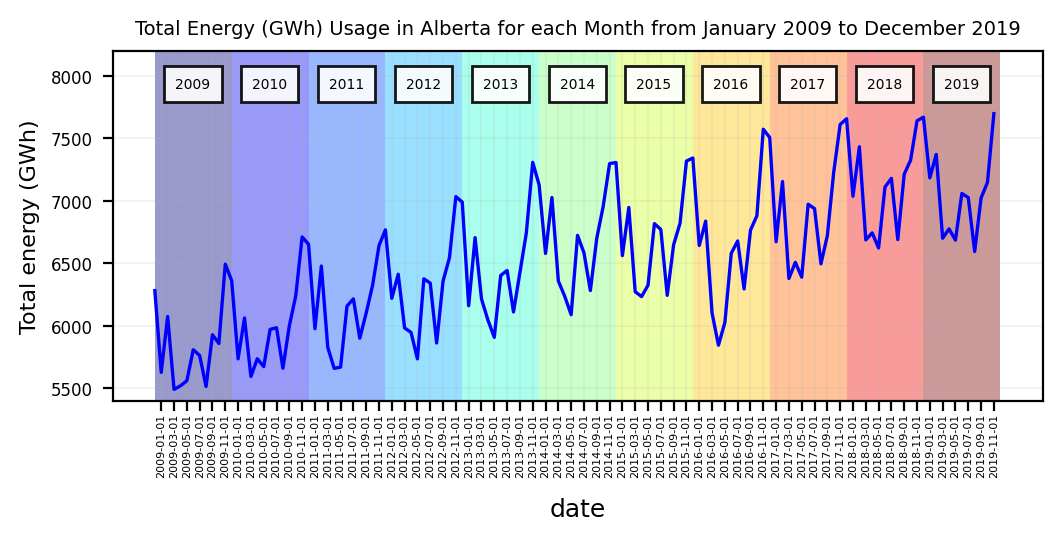

In [27]:
font = {'size'   :6 }
plt.rc('font', **font)
fig=plt.figure(figsize=(6, 5), dpi= 200, facecolor='w', edgecolor='k')
ax1=plt.subplot(2,1,1) 

date=df['date'].astype(str).values.tolist()
tot_Engy=df['Total energy (GWh)'].values.tolist()
plt.plot(date,tot_Engy,color='b',linewidth=1.2)
ax1.grid(axis='both',linewidth='0.1')
plt.xticks(np.arange(1,len(date)+1),date)
ax1.set_xticklabels(date, rotation=90,fontsize=4,y=0.02)
plt.title('Total Energy (GWh) Usage in Alberta for each Month from January 2009 to December 2019',fontsize=7)

plt.xlabel('date',fontsize=9,labelpad=7)
plt.ylabel('Total energy (GWh)',fontsize=8)

jet= plt.get_cmap('jet')
colors = plt.cm.jet(np.linspace(0,1,11))

for imnth in range(0,11):
    plt.axvspan(12*imnth,12*(imnth+1), facecolor=colors[imnth], alpha=0.4)
    plt.text(6*(imnth+(imnth+1))-2.8, 7900,str(2009+imnth),fontsize=5,bbox=dict(facecolor='w', alpha=0.9))

plt.ylim((5400,8200))
plt.locator_params(axis='x', nbins=100)
plt.show()

## Training and Test sets

In [28]:
# Training set for years less than 2018
X_train = df[df['date']<'2019']
#X_train.reset_index(drop=True, inplace=True)

# Test set for the year 2019
X_test = df[df['date']>='2019']
#X_test.reset_index(drop=True, inplace=True)

## Prediction with Supervised Learning

In [29]:
# Number of simulations
nsim=50

In [30]:
# Train LinearRegression
n_input=12 # 12 Months input
n_output=6 # 6 Months output

model=LinearRegression()
pred_no_all,full_test_nsim_all,full_test_nsim_m,MAE_all=time_series_forecst(n_input,n_output
                    ,nsim, model,X_train,clm='Total energy (GWh)',no='No.',test1=X_test)

### Cross-Validation on Time-Series data

### Predictive Algorithms 

Linear Regression: 0.528606 (0.420205)
Neural Network: 0.321657 (0.335952)
Decision Tree: -0.357049 (0.481546)
Random Forest: 0.327395 (0.210731)


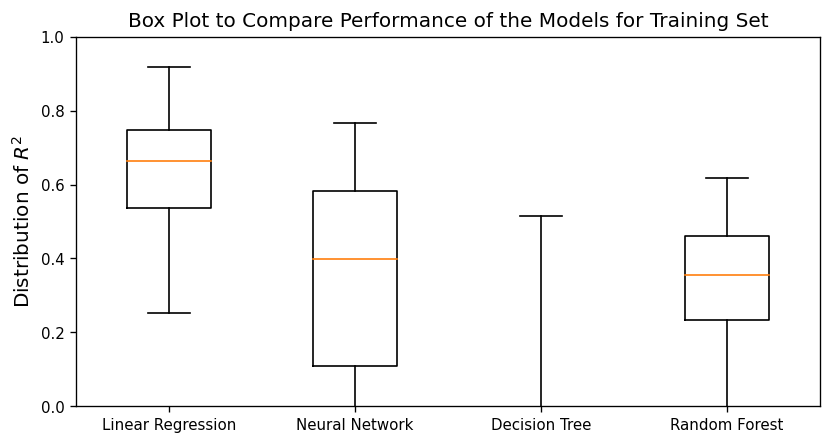

In [31]:
font = {'size'   : 9}
plt.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(8, 4), dpi= 120, facecolor='w', edgecolor='k')

# Spot Check Algorithms
np.random.seed(42) 
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Neural Network', MLPRegressor(solver = 'lbfgs',hidden_layer_sizes=500,early_stopping=True)))
models.append(('Decision Tree', DecisionTreeRegressor())) 
models.append(('Random Forest', RandomForestRegressor(n_estimators = 100))) 
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=10)
    
    # Train models
    pred_no_all,full_test_nsim_all,full_test_nsim_m,MAE_all,X_train_ts, y_train_ts=time_series_forecst(n_input,n_output
                        ,1, model,X_train,clm='Total energy (GWh)',no='No.', data_out=True,test1=X_test)    
    
    cv_results = cross_val_score(model, X_train_ts, y_train_ts, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.ylim((0,1))
plt.boxplot(results,meanline=True, labels=names)
plt.ylabel('Distribution of '+r"$R^{2}$",fontsize=12)
plt.title('Box Plot to Compare Performance of the Models for Training Set',fontsize=12)
plt.show()

In [32]:
# Make empty Total energy (GWh) for year 2020
test_2020=[f'2020-{"%02d" % (i+1,)}-01' for i in range(12)]
test_2020=pd.DataFrame(test_2020,columns=['date'])
test_2020['Total energy (GWh)']=len(test_2020)*[np.nan]
#
# Make empty Total energy (GWh) for year 2021
test_2021=[f'2021-{"%02d" % (i+1,)}-01' for i in range(12)]
test_2021=pd.DataFrame(test_2021,columns=['date'])
test_2021['Total energy (GWh)']=len(test_2021)*[np.nan]
#
# Make empty Total energy (GWh) for year 2022
test_2022=[f'2022-{"%02d" % (i+1,)}-01' for i in range(12)]
test_2022=pd.DataFrame(test_2022,columns=['date'])
test_2022['Total energy (GWh)']=len(test_2022)*[np.nan]
#
# Make empty Total energy (GWh) for year 2023
test_2023=[f'2023-{"%02d" % (i+1,)}-01' for i in range(12)]
test_2023=pd.DataFrame(test_2023,columns=['date'])
test_2023['Total energy (GWh)']=len(test_2023)*[np.nan]

In [33]:
model=RandomForestRegressor(n_estimators = 100)
pred_no_all,full_test_nsim_all_rf,full_test_nsim_m_rf,MAE_all_rf,X_train_ts_rf, y_train_ts_rf=time_series_forecst(n_input,n_output
                    ,nsim, model,X_train,clm='Total energy (GWh)',no='No.', data_out=True,test1=X_test,
                    test2=test_2020,test3=test_2021,test4=test_2022,test5=test_2023)   
#
model=LinearRegression()
pred_no_all,full_test_nsim_all_lr,full_test_nsim_m_lr,MAE_all_lr,X_train_ts_lr, y_train_ts_lr=time_series_forecst(n_input,n_output
                    ,nsim, model,X_train,clm='Total energy (GWh)',no='No.', data_out=True,test1=X_test,
                    test2=test_2020,test3=test_2021,test4=test_2022,test5=test_2023)    
#
model=MLPRegressor(solver = 'lbfgs',hidden_layer_sizes=500,early_stopping=True)
pred_no_all,full_test_nsim_all_ml,full_test_nsim_m_ml,MAE_all_ml,X_train_ts_ml, y_train_ts_ml=time_series_forecst(n_input,n_output
                    ,nsim, model,X_train,clm='Total energy (GWh)',no='No.', data_out=True,test1=X_test,
                    test2=test_2020,test3=test_2021,test4=test_2022,test5=test_2023)    
#
model=DecisionTreeRegressor()
pred_no_all,full_test_nsim_all_dt,full_test_nsim_m_dt,MAE_all_dt,X_train_ts_dt, y_train_ts_dt=time_series_forecst(n_input,n_output
                    ,nsim, model,X_train,clm='Total energy (GWh)',no='No.', data_out=True,test1=X_test,
                    test2=test_2020,test3=test_2021,test4=test_2022,test5=test_2023)   

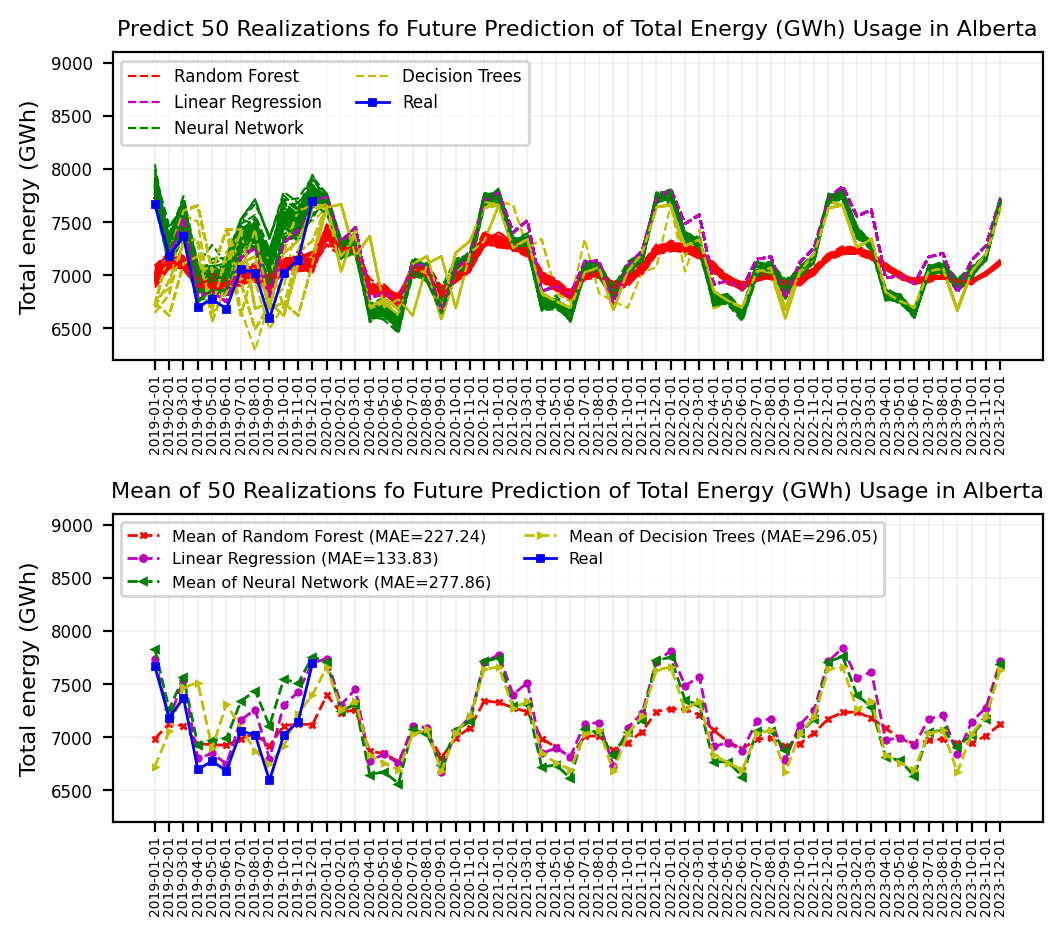

In [34]:
date=X_test['date'].astype(str).values.tolist()+test_2020['date'
            ].astype(str).values.tolist()+test_2021['date'].astype(str).values.tolist()+test_2022['date'
            ].astype(str).values.tolist()+test_2023['date'].astype(str).values.tolist()

date_real=X_test['Total energy (GWh)'].to_list()+test_2020['Total energy (GWh)'].to_list()+test_2021['Total energy (GWh)'
            ].to_list()+test_2022['Total energy (GWh)'].to_list()+test_2023['Total energy (GWh)'].to_list()
    
font = {'size'   :6 }
plt.rc('font', **font)
fig=plt.figure(figsize=(6, 5), dpi= 200, facecolor='w', edgecolor='k')
ax1=plt.subplot(2,1,1) 

# Number of prediction
n_pred= 5 
# Make realizations 
for i in range(nsim):
    real_rf=[]
    real_lr=[]
    real_ml=[]
    real_dt=[]    
    for j in range(n_pred):
        real_rf=real_rf+full_test_nsim_all_rf[j][i]
        real_lr=real_lr+full_test_nsim_all_lr[j][i]
        real_ml=real_ml+full_test_nsim_all_ml[j][i]
        real_dt=real_dt+full_test_nsim_all_dt[j][i]   
    if i==0: 
        label_rf='Random Forest'
        label_lr='Linear Regression'
        label_ml='Neural Network'
        label_dt='Decision Trees'           
    else: 
        label_rf= None
        label_lr= None
        label_ml= None
        label_dt= None      
    plt.plot(np.ravel(pred_no_all),real_rf,'r--',linewidth=0.8,label=label_rf)
    plt.plot(np.ravel(pred_no_all),real_lr,'m--',linewidth=0.8,label=label_lr)
    plt.plot(np.ravel(pred_no_all),real_ml,'g--',linewidth=0.8,label=label_ml)
    plt.plot(np.ravel(pred_no_all),real_dt,'y--',linewidth=0.8,label=label_dt)
    
plt.plot(np.ravel(pred_no_all),date_real,'bs-',markersize=2,linewidth=1.0,label='Real')  
ax1.grid(axis='both',linewidth='0.1')
plt.title(f"Predict {nsim} Realizations fo Future Prediction of Total Energy (GWh) Usage in Alberta",fontsize=8)
plt.ylabel('Total energy (GWh)',fontsize=8)
plt.xticks(np.ravel(pred_no_all), date,rotation=90,fontsize=5,y=0.02)
plt.legend(loc=2,ncol=2,fontsize=6,markerscale=1.1)
plt.ylim(6200,9100)

ax1=plt.subplot(2,1,2) 

# Mean of realizations    
plt.plot(np.ravel(pred_no_all),np.ravel(full_test_nsim_m_rf),'rx--',markersize=2,
         linewidth=1.0,label=f'Mean of Random Forest (MAE={np.round(MAE_all_rf,2)})')
plt.plot(np.ravel(pred_no_all),np.ravel(full_test_nsim_m_lr),'mo--',markersize=2,
         linewidth=1.0,label=f'Linear Regression (MAE={np.round(MAE_all_lr,2)})')
plt.plot(np.ravel(pred_no_all),np.ravel(full_test_nsim_m_ml),'g<--',markersize=2,
         linewidth=1.0,label=f'Mean of Neural Network (MAE={np.round(MAE_all_ml,2)})')
plt.plot(np.ravel(pred_no_all),np.ravel(full_test_nsim_m_dt),'y>--',markersize=1.5,
         linewidth=1.0,label=f'Mean of Decision Trees (MAE={np.round(MAE_all_dt,2)})')

plt.plot(np.ravel(pred_no_all),date_real,
         'bs-',markersize=2,linewidth=1.0,label='Real')    

ax1.grid(axis='both',linewidth='0.1')
plt.title(f"Mean of {nsim} Realizations fo Future Prediction of Total Energy (GWh) Usage in Alberta",fontsize=8)
plt.ylabel('Total energy (GWh)',fontsize=8)
plt.xticks(np.ravel(pred_no_all), date,rotation=90,fontsize=5,y=0.02)
plt.legend(loc=2,ncol=2,fontsize=5.8,markerscale=1.1)
plt.ylim(6200,9100)
plt.subplots_adjust(hspace=0.5)

plt.show()

## Deep Learning

### Recurrent Neural Network (RNN)

In [35]:
pred_no_all,full_test_nsim_all_rnn,full_test_nsim_m_rnn,MAE_all_rnn,X_train_ts_rnn,\
              y_train_ts_rnn=time_series_forecst(n_input,n_output,nsim, model,X_train,clm='Total energy (GWh)',
              no='No.', data_out=True,deep_learning='rnn',activation='tanh',hl1=200,hl2=100,epochs=20,
              test1=X_test,test2=test_2020,test3=test_2021,test4=test_2022,test5=test_2023)   
clear_output(wait=False)

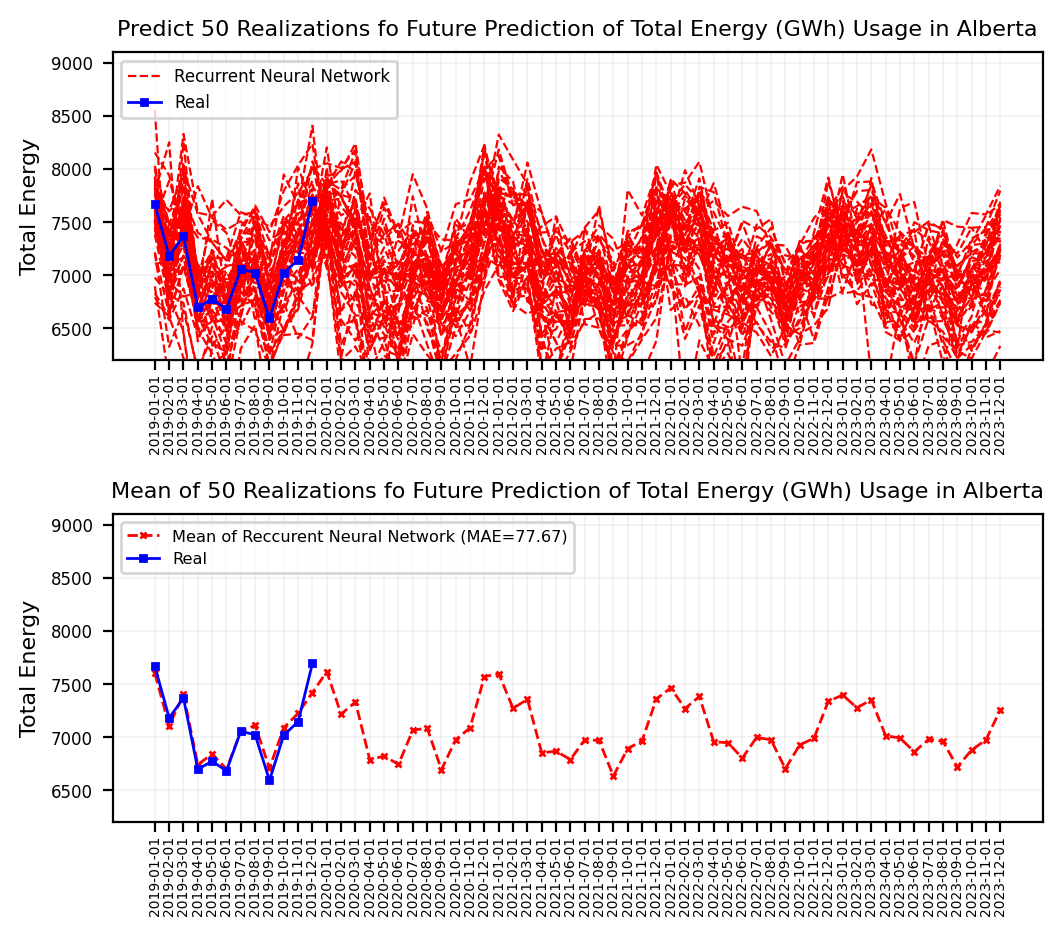

In [36]:
date=X_test['date'].astype(str).values.tolist()+test_2020['date'
            ].astype(str).values.tolist()+test_2021['date'].astype(str).values.tolist()+test_2022['date'
            ].astype(str).values.tolist()+test_2023['date'].astype(str).values.tolist()

date_real=X_test['Total energy (GWh)'].to_list()+test_2020['Total energy (GWh)'].to_list()+test_2021['Total energy (GWh)'
            ].to_list()+test_2022['Total energy (GWh)'].to_list()+test_2023['Total energy (GWh)'].to_list()

font = {'size'   :6 }
plt.rc('font', **font)
fig=plt.figure(figsize=(6, 5), dpi= 200, facecolor='w', edgecolor='k')
ax1=plt.subplot(2,1,1) 

# Make realizations 
for i in range(nsim):
    real=[]
    for j in range(n_pred):
        real=real+full_test_nsim_all_rnn[j][i]
    if i==0: 
        label='Recurrent Neural Network'
    else: 
        label= None
    plt.plot(np.ravel(pred_no_all),real,'r--',linewidth=0.8,label=label)
    
plt.plot(np.ravel(pred_no_all),date_real,'bs-',markersize=2,linewidth=1.0,label='Real')  
ax1.grid(axis='both',linewidth='0.1')
plt.title(f"Predict {nsim} Realizations fo Future Prediction of Total Energy (GWh) Usage in Alberta",fontsize=8)
plt.ylabel('Total Energy',fontsize=8)
plt.xticks(np.ravel(pred_no_all), date,rotation=90,fontsize=5,y=0.02)
plt.legend(loc=2,fontsize=6,markerscale=1.1)
plt.ylim(6200,9100)
ax1=plt.subplot(2,1,2) 

# Mean of realizations    
plt.plot(np.ravel(pred_no_all),np.ravel(full_test_nsim_m_rnn),'rx--',markersize=2,
         linewidth=1.0,label=f'Mean of Reccurent Neural Network (MAE={np.round(MAE_all_rnn,2)})')

plt.plot(np.ravel(pred_no_all),date_real,
         'bs-',markersize=2,linewidth=1.0,label='Real')    
ax1.grid(axis='both',linewidth='0.1')
plt.title(f"Mean of {nsim} Realizations fo Future Prediction of Total Energy (GWh) Usage in Alberta",fontsize=8)
plt.ylabel('Total Energy',fontsize=8)
plt.xticks(np.ravel(pred_no_all), date,rotation=90,fontsize=5,y=0.02)
plt.legend(loc=2,fontsize=5.8,markerscale=1.1)
plt.ylim(6200,9100)
plt.subplots_adjust(hspace=0.5)

plt.show()

### LSTM (Long Short-Term Memory) 

In [37]:
pred_no_all,full_test_nsim_all_lstm,full_test_nsim_m_lstm,MAE_all_lstm,X_train_ts_lstm,\
                 y_train_ts_lstm=time_series_forecst(n_input,n_output,nsim, model,X_train,clm='Total energy (GWh)',
                 no='No.', data_out=True,deep_learning='lstm',activation='tanh',hl1=200,hl2=100,epochs=20,
                 test1=X_test,test2=test_2020,test3=test_2021,test4=test_2022,test5=test_2023)   
clear_output(wait=False)

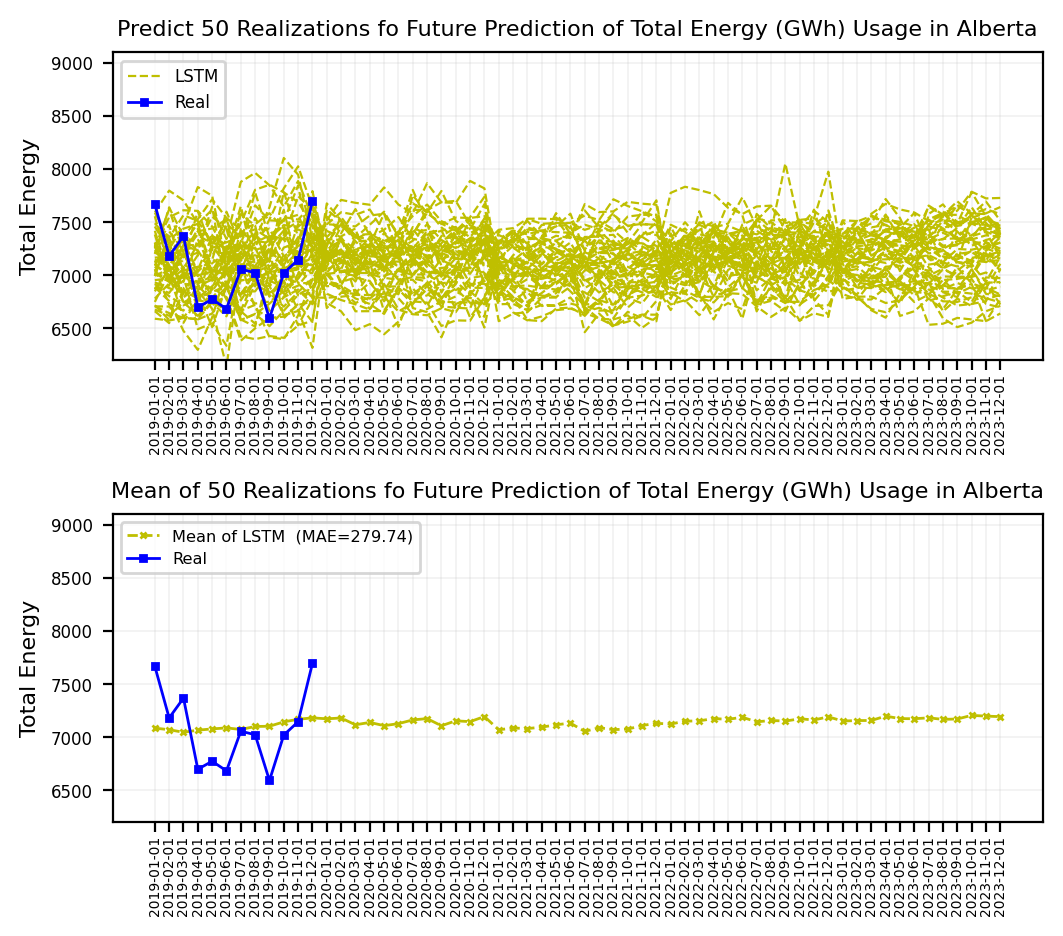

In [40]:
date=X_test['date'].astype(str).values.tolist()+test_2020['date'
            ].astype(str).values.tolist()+test_2021['date'].astype(str).values.tolist()+test_2022['date'
            ].astype(str).values.tolist()+test_2023['date'].astype(str).values.tolist()

date_real=X_test['Total energy (GWh)'].to_list()+test_2020['Total energy (GWh)'].to_list()+test_2021['Total energy (GWh)'
            ].to_list()+test_2022['Total energy (GWh)'].to_list()+test_2023['Total energy (GWh)'].to_list()
    
font = {'size'   :6 }
plt.rc('font', **font)
fig=plt.figure(figsize=(6, 5), dpi= 200, facecolor='w', edgecolor='k')
ax1=plt.subplot(2,1,1) 

# Number of prediction
n_pred= 5
# Make realizations 
for i in range(nsim):
    real=[]
    for j in range(n_pred):
        real=real+full_test_nsim_all_lstm[j][i]
    if i==0: 
        label='LSTM'
    else: 
        label= None
    plt.plot(np.ravel(pred_no_all),real,'y--',linewidth=0.8,label=label)
    
plt.plot(np.ravel(pred_no_all),date_real,'bs-',markersize=2,linewidth=1.0,label='Real')  
ax1.grid(axis='both',linewidth='0.1')
plt.title(f"Predict {nsim} Realizations fo Future Prediction of Total Energy (GWh) Usage in Alberta",fontsize=8)
plt.ylabel('Total Energy',fontsize=8)
plt.xticks(np.ravel(pred_no_all), date,rotation=90,fontsize=5,y=0.02)
plt.legend(loc=2,fontsize=6,markerscale=1.1)
plt.ylim(6200,9100)

ax1=plt.subplot(2,1,2) 

# Mean of realizations    
plt.plot(np.ravel(pred_no_all),np.ravel(full_test_nsim_m_lstm),'yx--',markersize=2,
         linewidth=1.0,label=f'Mean of LSTM  (MAE={np.round(MAE_all_lstm,2)})')

plt.plot(np.ravel(pred_no_all),date_real,
         'bs-',markersize=2,linewidth=1.0,label='Real')    

ax1.grid(axis='both',linewidth='0.1')
plt.title(f"Mean of {nsim} Realizations fo Future Prediction of Total Energy (GWh) Usage in Alberta",fontsize=8)
plt.ylabel('Total Energy',fontsize=8)
plt.xticks(np.ravel(pred_no_all), date,rotation=90,fontsize=5,y=0.02)
plt.legend(loc=2,fontsize=5.8,markerscale=1.1)
plt.ylim(6200,9100)
plt.subplots_adjust(hspace=0.5)

plt.show()

### Gated Recurrent Unit (GRU)

In [41]:
pred_no_all,full_test_nsim_all_gru,full_test_nsim_m_gru,MAE_all_gru,X_train_ts_gru,\
                 y_train_ts_gru=time_series_forecst(n_input,n_output,nsim, model,X_train,clm='Total energy (GWh)',
                 no='No.', data_out=True,deep_learning='gru',activation='tanh',hl1=200,hl2=100,epochs=20,
                 test1=X_test,test2=test_2020,test3=test_2021,test4=test_2022,test5=test_2023)   

clear_output(wait=False)

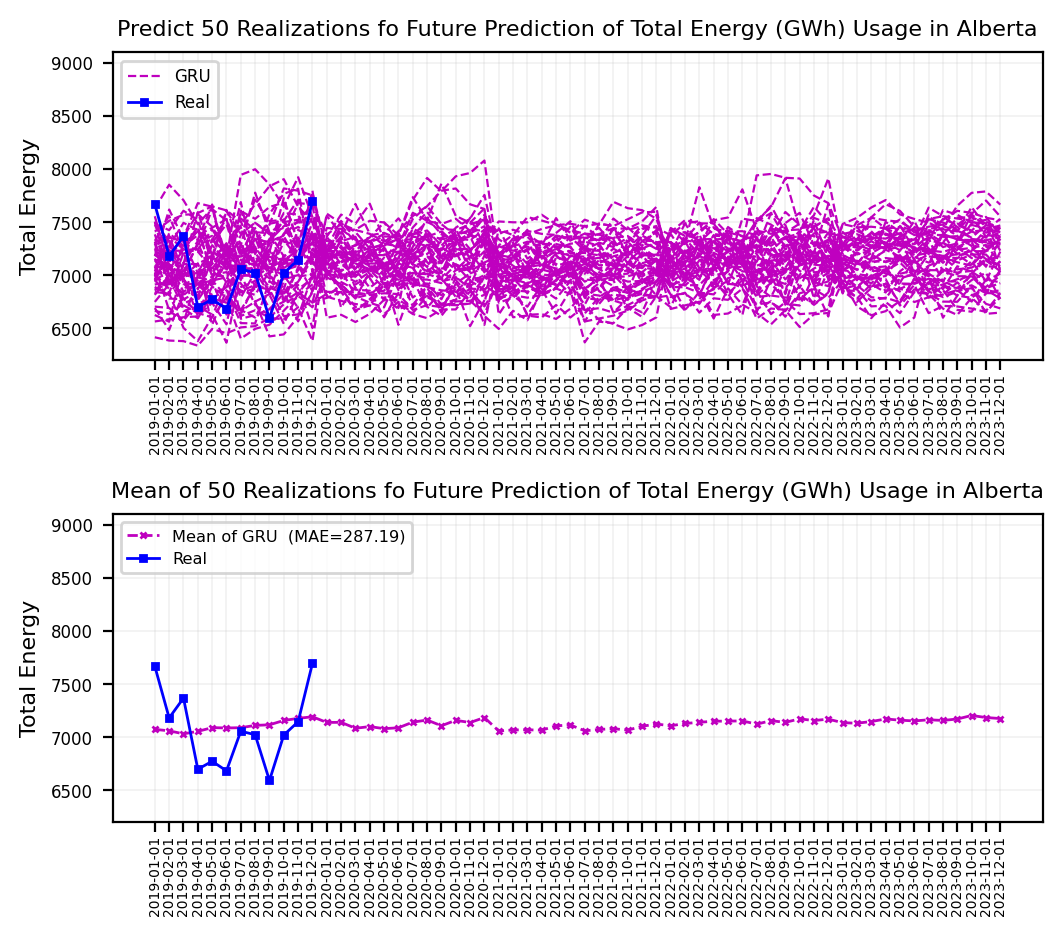

In [42]:
date=X_test['date'].astype(str).values.tolist()+test_2020['date'
            ].astype(str).values.tolist()+test_2021['date'].astype(str).values.tolist()+test_2022['date'
            ].astype(str).values.tolist()+test_2023['date'].astype(str).values.tolist()

date_real=X_test['Total energy (GWh)'].to_list()+test_2020['Total energy (GWh)'].to_list()+test_2021['Total energy (GWh)'
            ].to_list()+test_2022['Total energy (GWh)'].to_list()+test_2023['Total energy (GWh)'].to_list()
    
font = {'size'   :6 }
plt.rc('font', **font)
fig=plt.figure(figsize=(6, 5), dpi= 200, facecolor='w', edgecolor='k')
ax1=plt.subplot(2,1,1) 

# Make realizations 
for i in range(nsim):
    real=[]
    for j in range(n_pred):
        real=real+full_test_nsim_all_gru[j][i]
    if i==0: 
        label='GRU'
    else: 
        label= None
    plt.plot(np.ravel(pred_no_all),real,'m--',linewidth=0.8,label=label)
    
plt.plot(np.ravel(pred_no_all),date_real,'bs-',markersize=2,linewidth=1.0,label='Real')  
ax1.grid(axis='both',linewidth='0.1')
plt.title(f"Predict {nsim} Realizations fo Future Prediction of Total Energy (GWh) Usage in Alberta",fontsize=8)
plt.ylabel('Total Energy',fontsize=8)
plt.xticks(np.ravel(pred_no_all), date,rotation=90,fontsize=5,y=0.02)
plt.legend(loc=2,fontsize=6,markerscale=1.1)
plt.ylim(6200,9100)

ax1=plt.subplot(2,1,2) 

# Mean of realizations    
plt.plot(np.ravel(pred_no_all),np.ravel(full_test_nsim_m_gru),'mx--',markersize=2,
         linewidth=1.0,label=f'Mean of GRU  (MAE={np.round(MAE_all_gru,2)})')

plt.plot(np.ravel(pred_no_all),date_real,
         'bs-',markersize=2,linewidth=1.0,label='Real')    

ax1.grid(axis='both',linewidth='0.1')
plt.title(f"Mean of {nsim} Realizations fo Future Prediction of Total Energy (GWh) Usage in Alberta",fontsize=8)
plt.ylabel('Total Energy',fontsize=8)
plt.xticks(np.ravel(pred_no_all), date,rotation=90,fontsize=5,y=0.02)
plt.legend(loc=2,fontsize=5.8,markerscale=1.1)
plt.ylim(6200,9100)
plt.subplots_adjust(hspace=0.5)

plt.show()

## Uncertainty Assessment for Prediction at 2023-12-01

<span class="mark">Recurrent Neural Network (RNN) has the lowest MAE with actual values. Multiple simulations of RNN at 2023-12-01 are applied for uncertainty assessment.</span>

In [43]:
forecasting=[ii[-1] for ii in full_test_nsim_all_rnn[-1]]

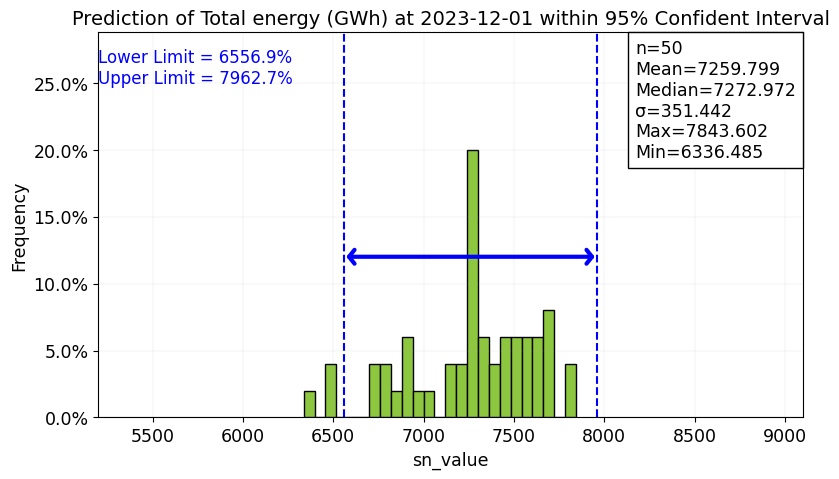

In [44]:
fig, ax1 = plt.subplots(figsize=(20,5), dpi= 100, facecolor='w', edgecolor='k')
ax1=plt.subplot(1,2,1) 

m=np.mean(forecasting)      
vr= np.var(forecasting)     
sd_m=np.sqrt(vr)
low_lim_t=m-2*sd_m
up_lim_t=m+2*sd_m

EDA_plot.histplt (forecasting,bins=25,title=f'Prediction of Total energy (GWh) at 2023-12-01 within 95% Confident Interval',
                  xlabl='sn_value',ylabl='Frequency',xlimt=(5200,9100),ylimt=(0,0.25),axt=ax1,
                   scale=1.25,loc=1,font=10,color='#8DC63F')
plt.annotate(text='', xy=(low_lim_t,0.12), xytext=(up_lim_t,0.12), 
             arrowprops=dict(arrowstyle='<->, head_width=0.5',lw=3,color='b'))
#plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.axvline(x=low_lim_t,linestyle='--',color='b')
plt.axvline(x=up_lim_t,linestyle='--',color='b')
txt= f'Lower Limit = {np.round(low_lim_t,1)}% \nUpper Limit = {np.round(up_lim_t,1)}% '

x0, xmax = plt.xlim()
y0, ymax = plt.ylim()
plt.text(x0 , ymax, txt, color='b',fontsize=12)
plt.ylim(0,ymax+ymax*0.15)   
plt.show()

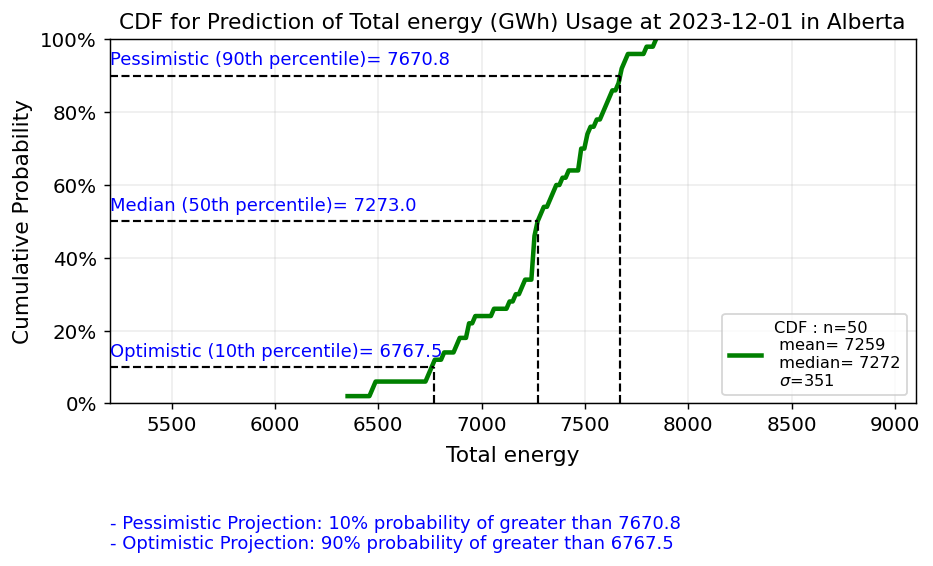

In [46]:
font = {'size'   : 11}
plt.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(8, 8), dpi= 130, facecolor='w', edgecolor='k')

ax1=plt.subplot(2,1,1)
title=f'CDF for Prediction of Total energy (GWh) Usage at 2023-12-01 in Alberta'
EDA_plot.CDF_plot(forecasting,1,label='CDF',colors='g',xlabel='Total energy',
                  title=title,ylabel='Cumulative Probability',bins=100,xlim=(5200,9100),ylim=(0,1),
                  linewidth=2.5,loc=4,axt=ax1,x_ftze=12,y_ftze=12,tit_ftze=12,leg_ftze=9)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
x0, xmax = plt.xlim()
y0, ymax = plt.ylim()

# 10th percentile
per=0.1
Perctile_10=np.quantile(forecasting, per, axis=0, keepdims=True)[0]
txt= 'Optimistic (10th percentile)= '
txt+=f'{np.round(Perctile_10,1)}'
plt.plot([x0, Perctile_10], [per, per], 'k--', linewidth=1.2)
plt.plot([Perctile_10, Perctile_10], [y0, per], 'k--', linewidth=1.2)
plt.text(x0, per+0.03, txt, color='b',
         fontsize=10)

# 50th percentile
per=0.5
Perctile=np.quantile(forecasting, per, axis=0, keepdims=True)[0]
txt= 'Median (50th percentile)= '
txt+=f'{np.round(Perctile,1)}'
plt.plot([x0, Perctile], [per, per], 'k--', linewidth=1.2)
plt.plot([Perctile, Perctile], [y0, per], 'k--', linewidth=1.2)
plt.text(x0, per+0.03, txt, color='b',
         fontsize=10)

# 90th percentile
per=0.9
Perctile_90=np.quantile(forecasting, per, axis=0, keepdims=True)[0]
txt= 'Pessimistic (90th percentile)= '
txt+=f'{np.round(Perctile_90,1)}'
plt.plot([x0, Perctile_90], [per, per], 'k--', linewidth=1.2)
plt.plot([Perctile_90, Perctile_90], [y0, per], 'k--', linewidth=1.2)
plt.text(x0, per+0.03, txt, color='b',
         fontsize=10)

txt=f"""- Pessimistic Projection: 10% probability of greater than {np.round(Perctile_90,1)} 
- Optimistic Projection: 90% probability of greater than {np.round(Perctile_10,1)}"""
plt.text(x0, -0.4, txt, color='b',
         fontsize=10)
plt.show()